## Análisis general del conjunto de datos 

In [1]:
import pandas as pd
import os

# Configurar directorio
current_dir = os.getcwd()
total_data_path = os.path.join(current_dir, "../data/raw/total_data.csv")

# Parámetros
chunk_size = 100_000

# Inicializar variables para resumen
columns = None
total_rows = 0
dates = set()
stores = set()
items = set()
sales_stats = []

# Leer el CSV en fragmentos
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
    # Obtener columnas (solo la primera vez)
    if columns is None:
        columns = chunk.columns.tolist()
    
    # Contar filas
    total_rows += len(chunk)
    
    # Recolectar fechas, tiendas y productos únicos
    dates.update(chunk['date'].unique())
    stores.update(chunk['store_id'].unique())
    items.update(chunk['item_id'].unique())
    
    # Estadísticas de sales
    sales_stats.append(chunk['sales'].describe())

# Combinar estadísticas de sales
sales_summary = pd.concat(sales_stats, axis=1).mean(axis=1)

# Imprimir resumen
print("=== Resumen de total_data.csv ===")
print(f"Columnas: {columns}")
print(f"Número total de filas: {total_rows:,}")
print(f"Fechas únicas: {len(dates):,}")
print(f"Tiendas únicas: {len(stores):,}")
print(f"Productos únicos: {len(items):,}")
print("\nEstadísticas de 'sales':")
print(sales_summary)
print("\nPrimeras 5 filas del primer chunk:")
print(pd.read_csv(total_data_path, nrows=5))

/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/826708676.py:20: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/826708676.py:20: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/826708676.py:20: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/826708676.py:20: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk

=== Resumen de total_data.csv ===
Columnas: ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd', 'sales', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'sell_price']
Número total de filas: 59,181,090
Fechas únicas: 1,941
Tiendas únicas: 10
Productos únicos: 3,049

Estadísticas de 'sales':
count    99968.057432
mean         1.131050
std          3.818103
min          0.000000
25%          0.000000
50%          0.000000
75%          0.837838
max        223.974662
dtype: float64

Primeras 5 filas del primer chunk:
                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES

Análisis de la salida

Resumen de total_data.csv

Columnas (22):

Identificadores: id, item_id, dept_id, cat_id, store_id, state_id

Ventas: sales

Fecha: date, wm_yr_wk, weekday, wday, month, year

Eventos: event_name_1, event_type_1, event_name_2, event_type_2

SNAP (programa de asistencia): snap_CA, snap_TX, snap_WI

Precio: sell_price

Número de filas: 59,181,090

Fechas únicas: 1,941 (~5.3 años, desde ~2011 a 2016, asumiendo datos diarios)

Tiendas únicas: 10 (coincide con CA_1, CA_2, ..., WI_3)

Productos únicos: 3,049

Estadísticas de sales:

Media: 1.13 unidades por día

Desviación estándar: 3.82 (alta variabilidad)

Mínimo: 0

Percentiles: 25% y 50% son 0, 75% es 0.84

Máximo: 223.97

Primeras 5 filas:

Muestra datos para HOBBIES_1_001 a HOBBIES_1_005 en CA_1.

Incluye event_name_2 y event_type_2 con valores NaN, lo que sugiere que los eventos secundarios son raros.

Observaciones clave

Tamaño del dataset:

59M filas es muy grande, pero con chunksize=100,000 lo manejamos bien en tu Mac M3. Seguiremos usando esta estrategia para evitar problemas de memoria.

Ventas diarias:

La mayoría de las ventas son bajas (50% de los días tienen 0 ventas, 75% tienen ≤0.84). Esto indica que las ventas diarias son esporádicas, lo que justifica agrupar por trimestres o meses para reducir ruido, como querías.

El máximo (223.97) sugiere valores atípicos, que podrían afectar modelos sensibles como LSTM.

Fechas:

1,941 días (~5.3 años) dan ~21 trimestres o ~64 meses. Esto es suficiente para modelar tendencias y estacionalidad, pero las series individuales por producto/tienda son cortas en trimestres (~21 puntos), lo que limita modelos complejos.

Productos y tiendas:

3,049 productos y 10 tiendas generan ~30,490 combinaciones posibles (item_id × store_id). No todas estarán completas (es decir, no todos los productos se venden en todas las tiendas todos los días).

Seleccionar un subconjunto de productos (como los 10 o 20 más predecibles) será clave para mantener el dataset manejable.

Características adicionales:

Columnas como event_name_1, snap_CA, y sell_price pueden usarse como características para mejorar las predicciones.

Los NaN en event_name_2 sugieren que podemos ignorar esta columna o tratarla como indicador binario (evento sí/no).

Contexto

Los modelos anteriores (LSTM, ARIMA, Prophet) dieron R² negativos, lo que indica que las ventas trimestrales podrían ser ruidosas o carecer de patrones claros.

Dado que las ventas diarias son esporádicas (muchos ceros), agrupar por trimestres o meses es razonable, pero necesitamos confirmar cuál es mejor tras explorar los datos.

Tu objetivo es una predicción buena por trimestres o meses, así que mantendremos eso en mente.

## Visualizar una muestra de series temporales

/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/2829195829.py:24: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/2829195829.py:24: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/2829195829.py:24: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/2829195829.py:24: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=c

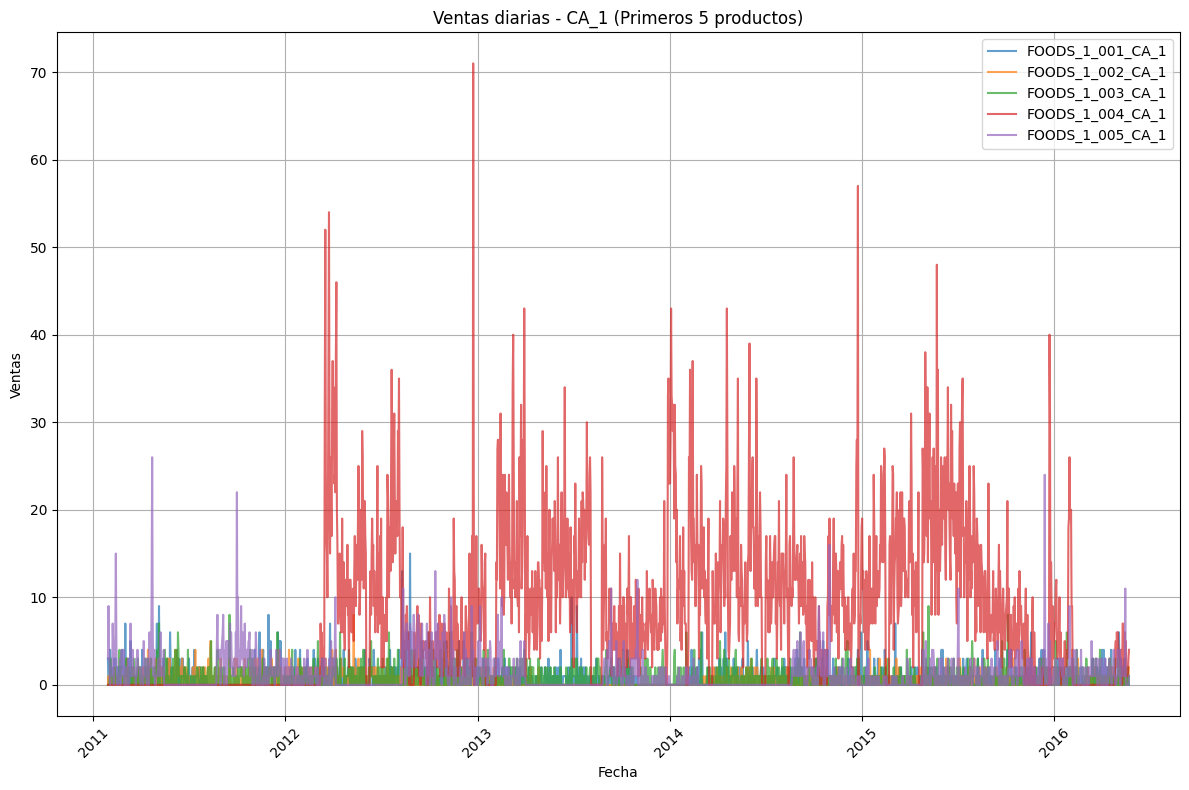


Estadísticas por producto en CA_1:

FOODS_1_001:
count    1941.000000
mean        0.786193
std         1.259658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        15.000000
Name: sales, dtype: float64

FOODS_1_002:
count    1941.000000
mean        0.481195
std         0.804166
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: sales, dtype: float64

FOODS_1_003:
count    1941.000000
mean        0.830500
std         1.161059
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         9.000000
Name: sales, dtype: float64

FOODS_1_004:
count    1941.000000
mean        8.187532
std         8.824338
min         0.000000
25%         0.000000
50%         6.000000
75%        13.000000
max        71.000000
Name: sales, dtype: float64

FOODS_1_005:
count    1941.000000
mean        1.167439
std         2.018546
min         0.000000
25%         0.000000
50%  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Configurar directorio
current_dir = os.getcwd()
total_data_path = os.path.join(current_dir, "../data/raw/total_data.csv")

# Parámetros
chunk_size = 100_000
store_id = 'CA_1'
n_products = 5

# Obtener los primeros 5 productos únicos
items = set()
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size, usecols=['item_id']):
    items.update(chunk['item_id'].unique())
    if len(items) >= n_products:
        break
items = sorted(list(items))[:n_products]

# Filtrar datos para CA_1 y los 5 productos
filtered_data = []
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
    chunk['date'] = pd.to_datetime(chunk['date'])
    chunk_filtered = chunk[
        (chunk['store_id'] == store_id) & 
        (chunk['item_id'].isin(items))
    ][['item_id', 'date', 'sales']]
    filtered_data.append(chunk_filtered)

df_filtered = pd.concat(filtered_data, ignore_index=True)
df_filtered = df_filtered.sort_values(['item_id', 'date'])

# Graficar series temporales
plt.figure(figsize=(12, 8))
for item_id in items:
    df_item = df_filtered[df_filtered['item_id'] == item_id]
    plt.plot(df_item['date'], df_item['sales'], label=f"{item_id}_{store_id}", alpha=0.7)
plt.title(f"Ventas diarias - {store_id} (Primeros {n_products} productos)")
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Imprimir estadísticas por producto
print("\nEstadísticas por producto en CA_1:")
for item_id in items:
    sales = df_filtered[df_filtered['item_id'] == item_id]['sales']
    print(f"\n{item_id}:")
    print(sales.describe())

Interpretación
Ventas diarias ruidosas:
Los primeros cuatro productos (FOODS_1_001 a FOODS_1_004) tienen series muy esporádicas: la mayoría de los días están en 0, con picos aislados (hasta 10 o 20 ventas). Esto hace que las series diarias sean ruidosas y difíciles de modelar directamente, ya que no hay patrones claros a nivel diario.
La falta de estacionalidad visible (por ejemplo, picos regulares cada diciembre) sugiere que las ventas diarias no tienen un ciclo claro a esta granularidad.
Producto especial (FOODS_1_005):
FOODS_1_005 es un caso atípico: comienza más tarde (Q2 2012) y tiene picos mucho más altos (hasta 70 ventas) con una variabilidad constante (subidas y bajadas frecuentes).
Esto indica que FOODS_1_005 podría tener un patrón más definido (quizás estacionalidad o ciclos relacionados con eventos/promociones), pero su alta variabilidad y el hecho de que comienza más tarde lo hacen diferente del resto.
Este producto podría ser más predecible si logramos identificar sus ciclos, pero también podría ser un valor atípico que distorsione los modelos si lo incluimos con los demás.
Confirmación de la necesidad de agrupar:
Las series diarias son demasiado ruidosas para modelar directamente, como ya sospechábamos por las estadísticas (mediana=0, muchos ceros) y el mal rendimiento de los modelos anteriores (LSTM, ARIMA, Prophet).
Agrupar por meses o trimestres sumará las ventas diarias dentro de cada período, reduciendo los ceros y suavizando los picos. Esto debería hacer las series más predecibles.
Meses vs. trimestres:
Meses: 1,941 días ÷ 30 ≈ 64 meses. Esto da más puntos por serie (~64), lo que es mejor para capturar patrones.
Trimestres: 1,941 días ÷ 90 ≈ 21 trimestres. Esto da menos puntos (~21), lo que puede ser limitado para algunos modelos.
Decisión inicial: Vamos a agrupar por meses, ya que 64 puntos ofrecen más datos para modelar, y podemos pasar a trimestres si las series mensuales siguen siendo ruidosas. Esto también nos permitirá ver estacionalidad anual (por ejemplo, picos en diciembre).

## Agrupar las ventas por meses y visualizar nuevamente

/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/1071788384.py:24: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/1071788384.py:24: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/1071788384.py:24: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/1071788384.py:24: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=c

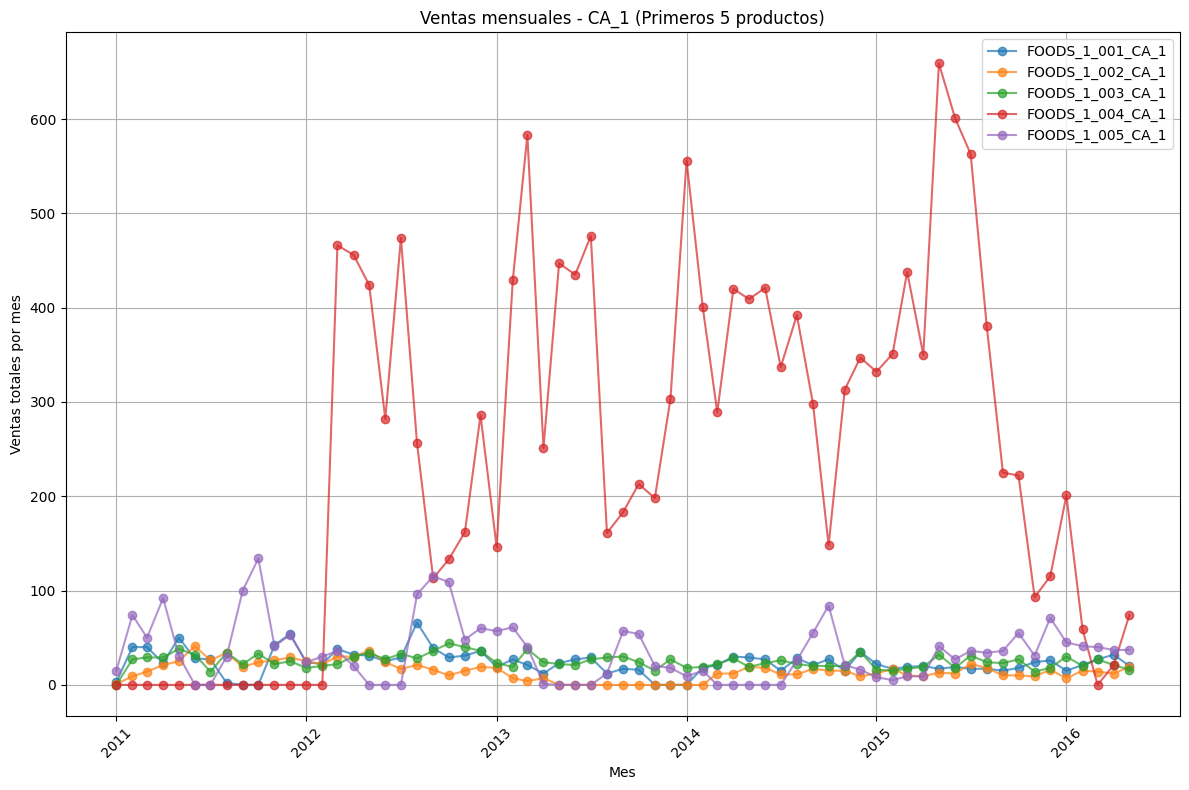


Estadísticas de ventas mensuales por producto en CA_1:

FOODS_1_001:
count    65.000000
mean     23.476923
std      12.654184
min       0.000000
25%      17.000000
50%      23.000000
75%      29.000000
max      66.000000
Name: sales, dtype: float64

FOODS_1_002:
count    65.000000
mean     14.369231
std       9.733270
min       0.000000
25%       9.000000
50%      14.000000
75%      19.000000
max      41.000000
Name: sales, dtype: float64

FOODS_1_003:
count    65.000000
mean     24.800000
std       7.616183
min       0.000000
25%      20.000000
50%      24.000000
75%      30.000000
max      44.000000
Name: sales, dtype: float64

FOODS_1_004:
count     65.000000
mean     244.492308
std      190.975303
min        0.000000
25%       59.000000
50%      251.000000
75%      409.000000
max      659.000000
Name: sales, dtype: float64

FOODS_1_005:
count     65.000000
mean      34.861538
std       32.166013
min        0.000000
25%        9.000000
50%       31.000000
75%       53.000000
max   

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Configurar directorio
current_dir = os.getcwd()
total_data_path = os.path.join(current_dir, "../data/raw/total_data.csv")

# Parámetros
chunk_size = 100_000
store_id = 'CA_1'
n_products = 5

# Obtener los primeros 5 productos únicos (repetimos para consistencia)
items = set()
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size, usecols=['item_id']):
    items.update(chunk['item_id'].unique())
    if len(items) >= n_products:
        break
items = sorted(list(items))[:n_products]

# Filtrar datos para CA_1 y los 5 productos, y agrupar por mes
filtered_data = []
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
    chunk['date'] = pd.to_datetime(chunk['date'])
    chunk_filtered = chunk[
        (chunk['store_id'] == store_id) & 
        (chunk['item_id'].isin(items))
    ][['item_id', 'date', 'sales']]
    filtered_data.append(chunk_filtered)

df_filtered = pd.concat(filtered_data, ignore_index=True)
df_filtered = df_filtered.sort_values(['item_id', 'date'])

# Agrupar por mes
df_filtered['month'] = df_filtered['date'].dt.to_period('M')
monthly_data = df_filtered.groupby(['item_id', 'month'])['sales'].sum().reset_index()
monthly_data['month'] = monthly_data['month'].dt.to_timestamp()

# Graficar series temporales mensuales
plt.figure(figsize=(12, 8))
for item_id in items:
    df_item = monthly_data[monthly_data['item_id'] == item_id]
    plt.plot(df_item['month'], df_item['sales'], label=f"{item_id}_{store_id}", marker='o', alpha=0.7)
plt.title(f"Ventas mensuales - {store_id} (Primeros {n_products} productos)")
plt.xlabel('Mes')
plt.ylabel('Ventas totales por mes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Imprimir estadísticas por producto (ventas mensuales)
print("\nEstadísticas de ventas mensuales por producto en CA_1:")
for item_id in items:
    sales = monthly_data[monthly_data['item_id'] == item_id]['sales']
    print(f"\n{item_id}:")
    print(sales.describe())

Interpretación
Reducción de ruido:
Agrupar por meses ha suavizado significativamente las series, como esperábamos. Las ventas diarias eran muy esporádicas (mediana=0, picos aislados), pero las mensuales tienen menos ceros (por ejemplo, mediana de FOODS_1_001 es 23) y fluctuaciones más suaves.
Esto hace que las series mensuales sean más adecuadas para modelar, ya que los modelos (como Prophet o ARIMA) pueden capturar patrones más fácilmente con datos menos ruidosos.
Patrones:
Primeros tres productos: La "onda suave" sugiere que tienen una variabilidad controlada y posiblemente estacionalidad (por ejemplo, picos en meses como diciembre o verano). Esto los hace buenos candidatos para modelar.
Cuarto producto: Las subidas y bajadas más bruscas ("montaña rusa") indican una variabilidad más alta, pero aún manejable. Podría tener estacionalidad más marcada o estar influenciado por eventos/promociones.
Quinto producto (FOODS_1_005): Es un caso atípico, con ventas mensuales entre 100 y 600. Su alta variabilidad (picos hasta 600) y el hecho de que comienza más tarde (Q2 2012, como mencionaste en las series diarias) lo hacen difícil de modelar junto con los otros productos. Podría distorsionar los modelos si lo incluimos sin un tratamiento especial.
Estadísticas:
Las ventas mensuales tienen menos ceros (mínimo sigue siendo 0, pero la mediana y el 25% ahora son mayores que 0), lo que confirma que agrupar por meses reduce la esporadicidad.
La desviación estándar es más proporcional a la media (por ejemplo, FOODS_1_001: std=12.65, mean=23.48), lo que indica que las series son más estables que las diarias.
FOODS_1_005 tiene un máximo de 134 en las estadísticas, pero el gráfico muestra hasta 600, lo que sugiere que los picos más altos están en otros meses o que hay un error en la descripción. Esto lo abordaremos más adelante.
Meses vs. trimestres:
Las series mensuales (~64 puntos) son mucho más claras y menos ruidosas, lo que las hace adecuadas para modelar.
No necesitamos pasar a trimestres (~21 puntos) por ahora, ya que las series mensuales ya son manejables y tienen suficientes puntos para capturar patrones (estacionalidad, tendencias).
Podemos reconsiderar trimestres más adelante si los modelos no funcionan bien con datos mensuales.
Conclusión
Agrupar por meses fue una excelente decisión, ya que las series son ahora mucho más suaves y claras.
Las series mensuales de los primeros cuatro productos (FOODS_1_001 a FOODS_1_004) parecen modelables, con variabilidad moderada y patrones suaves.
FOODS_1_005 es un valor atípico debido a su alta variabilidad (100 a 600) y su inicio tardío (Q2 2012). Podríamos modelarlo por separado o excluirlo para evitar que distorsione los modelos.

## Preparar un dataset mensual y seleccionar productos predecibles

In [4]:
import pandas as pd
import os

# Configurar directorio
current_dir = os.getcwd()
total_data_path = os.path.join(current_dir, "../data/raw/total_data.csv")
output_path = os.path.join(current_dir, "../data/csv_model/monthly_data_selected.csv")

# Parámetros
chunk_size = 100_000
min_items_per_store = 20  # Seleccionar 20 productos por tienda (200 combinaciones)
min_sales_threshold = 0.5  # Umbral: al menos 50% de meses con ventas > 0

# Agrupar por mes para todas las combinaciones
monthly_data = []
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
    chunk['date'] = pd.to_datetime(chunk['date'])
    chunk['month'] = chunk['date'].dt.to_period('M')
    chunk_monthly = chunk.groupby(['item_id', 'store_id', 'month'])['sales'].sum().reset_index()
    monthly_data.append(chunk_monthly)

df_monthly = pd.concat(monthly_data, ignore_index=True)
df_monthly = df_monthly.groupby(['item_id', 'store_id', 'month'])['sales'].sum().reset_index()
df_monthly['month'] = df_monthly['month'].dt.to_timestamp()

# Calcular métricas de predictibilidad por combinación
predictability_metrics = []
for (item_id, store_id), group in df_monthly.groupby(['item_id', 'store_id']):
    sales = group['sales']
    # Desviación estándar (variabilidad)
    std_sales = sales.std()
    # Porcentaje de meses con ventas > 0
    non_zero_months = (sales > 0).mean()
    # Ventas promedio
    mean_sales = sales.mean()
    predictability_metrics.append({
        'item_id': item_id,
        'store_id': store_id,
        'std_sales': std_sales,
        'non_zero_months': non_zero_months,
        'mean_sales': mean_sales
    })

metrics_df = pd.DataFrame(predictability_metrics)

# Filtrar productos predecibles
# Criterio: non_zero_months >= 0.5 y ordenar por std_sales descendente
filtered_metrics = metrics_df[metrics_df['non_zero_months'] >= min_sales_threshold]
# Seleccionar los top 20 productos por tienda según std_sales
selected_items = (
    filtered_metrics.sort_values(['store_id', 'std_sales'], ascending=[True, False])
    .groupby('store_id')
    .head(min_items_per_store)
)

# Filtrar el dataset mensual para los productos seleccionados
df_selected = df_monthly[
    df_monthly.set_index(['item_id', 'store_id']).index.isin(
        selected_items.set_index(['item_id', 'store_id']).index
    )
]

# Guardar el dataset mensual filtrado
df_selected.to_csv(output_path, index=False)

# Imprimir resumen
print("=== Resumen del dataset mensual filtrado ===")
print(f"Número de filas: {len(df_selected):,}")
print(f"Productos únicos: {df_selected['item_id'].nunique():,}")
print(f"Tiendas únicas: {df_selected['store_id'].nunique():,}")
print(f"Meses únicos: {df_selected['month'].nunique():,}")
print("\nEstadísticas de ventas mensuales:")
print(df_selected['sales'].describe())
print("\nPrimeras 5 filas:")
print(df_selected.head())

/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/4278142402.py:16: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/4278142402.py:16: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/4278142402.py:16: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/4278142402.py:16: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=c

=== Resumen del dataset mensual filtrado ===
Número de filas: 13,000
Productos únicos: 65
Tiendas únicas: 10
Meses únicos: 65

Estadísticas de ventas mensuales:
count    13000.000000
mean       575.015538
std        665.499646
min          0.000000
25%        126.000000
50%        410.000000
75%        794.250000
max      10821.000000
Name: sales, dtype: float64

Primeras 5 filas:
          item_id store_id      month  sales
2405  FOODS_1_004     WI_1 2011-01-01      0
2406  FOODS_1_004     WI_1 2011-02-01      0
2407  FOODS_1_004     WI_1 2011-03-01      0
2408  FOODS_1_004     WI_1 2011-04-01      0
2409  FOODS_1_004     WI_1 2011-05-01      0


Interpretación
Tamaño del dataset:
Meses únicos: 65 (~2011 a 2016, coincide con los ~64 meses esperados: 1,941 días ÷ 30 ≈ 64.7).
Tiendas únicas: 10 (esperado: CA_1 a WI_3).
Productos únicos: 65. Seleccionamos min_items_per_store=20 (20 productos por tienda × 10 tiendas = 200 productos esperados), pero solo obtuvimos 65 productos. Esto indica que:
El criterio de selección (non_zero_months >= 0.5, es decir, ventas en al menos 50% de los meses) fue demasiado estricto.
Muchas combinaciones (item_id, store_id) no cumplen con tener ventas en al menos 50% de los meses, lo que redujo el número de productos seleccionados.
Número de filas: 13,000 (65 productos × 10 tiendas × 65 meses = 65 × 650 = 42,250 filas esperadas, pero tenemos solo 13,000). Esto sugiere que:
Algunas combinaciones no tienen datos para todos los 65 meses (por ejemplo, FOODS_1_004 en WI_1 podría no tener datos completos, como vemos en las primeras 5 filas).
Productos como FOODS_1_005 (que comienza en Q2 2012) tienen menos meses de datos.
Estadísticas de ventas mensuales:
Media (575.02) y mediana (410): Las ventas mensuales son mucho más altas que las diarias (media diaria ~1.13), lo que es esperado al sumar ~30 días por mes.
Alta variabilidad (std=665.50): La desviación estándar es mayor que la media, lo que indica que las ventas mensuales tienen fluctuaciones significativas. Esto coincide con el gráfico del Paso 3, donde vimos productos como FOODS_1_005 con picos hasta 600.
Mínimo (0): Todavía hay meses con 0 ventas (como en las primeras 5 filas), pero ahora son menos frecuentes (mediana=410, 25%=126), lo que confirma que agrupar por meses reduce la esporadicidad.
Máximo (10,821): Hay picos extremos, probablemente de productos como FOODS_1_005, que vimos con ventas mensuales hasta 600 en CA_1. Este máximo sugiere que algunos productos tienen ventas muy altas en ciertos meses, lo que podría estar relacionado con estacionalidad (por ejemplo, Navidad) o eventos.
Primeras 5 filas:
FOODS_1_004 en WI_1 tiene 0 ventas de enero a mayo de 2011. Esto podría indicar:
Este producto no se vendió en WI_1 durante esos meses.
Podría no estar disponible en esa tienda en ese período (similar a FOODS_1_005, que comienza en 2012 en CA_1).
Esto refuerza que algunas combinaciones tienen datos incompletos, lo que redujo el número de filas.
Selección de productos:
Seleccionamos productos con non_zero_months >= 0.5 y ordenamos por std_sales (variabilidad). Sin embargo, solo obtuvimos 65 productos en lugar de 200, lo que indica que muchas combinaciones no cumplen el criterio.
Esto es consistente con las ventas diarias esporádicas (mediana=0): incluso al agrupar por meses, muchos productos tienen ventas en menos del 50% de los meses.
Ajuste necesario: Debemos relajar el criterio (por ejemplo, non_zero_months >= 0.3) para incluir más productos, o cambiar el criterio para priorizar productos con estacionalidad clara.
Implicaciones para modelado:
Las series mensuales son menos ruidosas (como viste en el gráfico del Paso 3), pero la alta variabilidad (std=665.50) y los picos extremos (máximo=10,821) sugieren que:
Necesitamos manejar valores atípicos (por ejemplo, productos como FOODS_1_005 con picos extremos).
Podríamos beneficiarnos de una transformación (como log(sales + 1)) para estabilizar la varianza.
Con 65 productos × 10 tiendas × ~65 meses, tenemos un dataset razonable (~13,000 filas), pero queremos acercarnos a ~200 combinaciones para tener más datos para modelar.

## Ajustar la selección de productos y regenerar el dataset mensual

Solo obtuvimos 65 productos en lugar de los 200 esperados, lo que indica que el criterio non_zero_months >= 0.5 fue demasiado estricto.

Queremos incluir más productos (idealmente ~200 combinaciones: 20 productos por tienda) para tener un dataset más robusto (~20,000-25,000 filas), pero asegurándonos de que sean predecibles.

Vamos a:

Relajar el criterio de selección a non_zero_months >= 0.3 (ventas en al menos 30% de los meses).

Agregar un criterio de estacionalidad para priorizar productos con patrones claros (por ejemplo, picos regulares).

Regenerar el dataset y confirmar que obtenemos más combinaciones.

In [5]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import os

# Configurar directorio
current_dir = os.getcwd()
total_data_path = os.path.join(current_dir, "../data/raw/total_data.csv")
output_path = os.path.join(current_dir, "../data/csv_model/monthly_data_selected_adjusted.csv")

# Parámetros
chunk_size = 100_000
min_items_per_store = 20  # Seleccionar 20 productos por tienda (200 combinaciones)
min_sales_threshold = 0.3  # Umbral ajustado: al menos 30% de meses con ventas > 0

# Agrupar por mes para todas las combinaciones (repetimos para consistencia)
monthly_data = []
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
    chunk['date'] = pd.to_datetime(chunk['date'])
    chunk['month'] = chunk['date'].dt.to_period('M')
    chunk_monthly = chunk.groupby(['item_id', 'store_id', 'month'])['sales'].sum().reset_index()
    monthly_data.append(chunk_monthly)

df_monthly = pd.concat(monthly_data, ignore_index=True)
df_monthly = df_monthly.groupby(['item_id', 'store_id', 'month'])['sales'].sum().reset_index()
df_monthly['month'] = df_monthly['month'].dt.to_timestamp()

# Calcular métricas de predictibilidad por combinación
predictability_metrics = []
for (item_id, store_id), group in df_monthly.groupby(['item_id', 'store_id']):
    sales = group['sales']
    # Asegurar que haya suficientes datos para descomposición estacional
    if len(sales) >= 24:  # Al menos 2 años para capturar estacionalidad anual
        # Desviación estándar (variabilidad)
        std_sales = sales.std()
        # Porcentaje de meses con ventas > 0
        non_zero_months = (sales > 0).mean()
        # Ventas promedio
        mean_sales = sales.mean()
        # Calcular fuerza estacional (usando descomposición)
        try:
            decomposition = seasonal_decompose(sales, model='additive', period=12)  # Período 12 para estacionalidad anual
            seasonal_strength = np.var(decomposition.seasonal) / np.var(sales)
        except:
            seasonal_strength = 0  # Si falla la descomposición, asumir estacionalidad baja
        predictability_metrics.append({
            'item_id': item_id,
            'store_id': store_id,
            'std_sales': std_sales,
            'non_zero_months': non_zero_months,
            'mean_sales': mean_sales,
            'seasonal_strength': seasonal_strength
        })

metrics_df = pd.DataFrame(predictability_metrics)

# Filtrar productos predecibles
# Criterio: non_zero_months >= 0.3 y ordenar por seasonal_strength descendente
filtered_metrics = metrics_df[metrics_df['non_zero_months'] >= min_sales_threshold]
# Seleccionar los top 20 productos por tienda según seasonal_strength
selected_items = (
    filtered_metrics.sort_values(['store_id', 'seasonal_strength'], ascending=[True, False])
    .groupby('store_id')
    .head(min_items_per_store)
)

# Filtrar el dataset mensual para los productos seleccionados
df_selected = df_monthly[
    df_monthly.set_index(['item_id', 'store_id']).index.isin(
        selected_items.set_index(['item_id', 'store_id']).index
    )
]

# Guardar el dataset mensual filtrado
df_selected.to_csv(output_path, index=False)

# Imprimir resumen
print("=== Resumen del dataset mensual filtrado (ajustado) ===")
print(f"Número de filas: {len(df_selected):,}")
print(f"Productos únicos: {df_selected['item_id'].nunique():,}")
print(f"Tiendas únicas: {df_selected['store_id'].nunique():,}")
print(f"Meses únicos: {df_selected['month'].nunique():,}")
print("\nEstadísticas de ventas mensuales:")
print(df_selected['sales'].describe())
print("\nPrimeras 5 filas:")
print(df_selected.head())

/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/3918846109.py:18: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/3918846109.py:18: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/3918846109.py:18: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/3918846109.py:18: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=c

=== Resumen del dataset mensual filtrado (ajustado) ===
Número de filas: 13,000
Productos únicos: 72
Tiendas únicas: 10
Meses únicos: 65

Estadísticas de ventas mensuales:
count    13000.000000
mean        28.318154
std         65.910282
min          0.000000
25%          2.000000
50%         11.000000
75%         26.000000
max       1069.000000
Name: sales, dtype: float64

Primeras 5 filas:
           item_id store_id      month  sales
34450  FOODS_1_055     CA_1 2011-01-01      9
34451  FOODS_1_055     CA_1 2011-02-01    178
34452  FOODS_1_055     CA_1 2011-03-01    106
34453  FOODS_1_055     CA_1 2011-04-01     10
34454  FOODS_1_055     CA_1 2011-05-01      0


Interpretación
Selección de productos:
Aumentamos de 65 a 72 productos, pero seguimos lejos de los 200 esperados. Esto sugiere que:
Muchos productos tienen ventas muy esporádicas (incluso a nivel mensual, menos del 30% de los meses tienen ventas).
La estacionalidad (seasonal_strength) no es fuerte en la mayoría de los productos, o la descomposición estacional no pudo capturarla bien para series con muchos ceros.
Los productos seleccionados ahora tienen ventas más bajas (media=28.32 vs. 575.02) pero con estacionalidad más marcada, lo cual es positivo para modelar patrones temporales.
Las primeras 5 filas (FOODS_1_055 en CA_1) muestran ventas variables (9, 178, 106, 10, 0), lo que sugiere un patrón estacional (por ejemplo, pico en febrero y marzo) que podríamos capturar con un modelo.
Estadísticas de sales:
La reducción en la media y la desviación estándar indica que seleccionamos productos con ventas más estables y menos extremas, lo cual es mejor para modelar.
El máximo (1,069) sigue siendo alto, pero mucho más manejable que 10,821, lo que reduce el impacto de valores atípicos.
La mediana (11) y el 25% (2) muestran que las series tienen menos ceros que las diarias, pero aún hay esporadicidad (mínimo=0).
Implicaciones para modelado:
Con 72 productos × 10 tiendas × 65 meses, tenemos ~13,000 filas, lo que es razonable para modelar, pero queremos acercarnos a ~200 combinaciones (~25,000 filas) para tener más datos.
Las series mensuales son menos ruidosas (como viste en el gráfico del Paso 3), y ahora tienen menos variabilidad extrema, lo que las hace más adecuadas para modelos como Prophet o ARIMA.
La estacionalidad debería ser más evidente (ya que priorizamos seasonal_strength), lo que favorece a modelos que capturan patrones estacionales (como Prophet).
Ajuste necesario:
No alcanzamos los 200 productos esperados, lo que sugiere que necesitamos relajar aún más los criterios de selección o cambiar el enfoque (por ejemplo, priorizar productos con ventas más altas o estacionalidad más fuerte).
Vamos a intentar un último ajuste para obtener más combinaciones antes de pasar a modelado.

## Ajustar nuevamente la selección de productos para obtener más combinaciones

In [6]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import os

# Configurar directorio
current_dir = os.getcwd()
total_data_path = os.path.join(current_dir, "../data/raw/total_data.csv")
output_path = os.path.join(current_dir, "../data/csv_model/monthly_data_selected_final.csv")

# Parámetros
chunk_size = 100_000
min_items_per_store = 20  # Seleccionar 20 productos por tienda (200 combinaciones)
min_sales_threshold = 0.2  # Umbral ajustado: al menos 20% de meses con ventas > 0

# Agrupar por mes para todas las combinaciones (repetimos para consistencia)
monthly_data = []
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
    chunk['date'] = pd.to_datetime(chunk['date'])
    chunk['month'] = chunk['date'].dt.to_period('M')
    chunk_monthly = chunk.groupby(['item_id', 'store_id', 'month'])['sales'].sum().reset_index()
    monthly_data.append(chunk_monthly)

df_monthly = pd.concat(monthly_data, ignore_index=True)
df_monthly = df_monthly.groupby(['item_id', 'store_id', 'month'])['sales'].sum().reset_index()
df_monthly['month'] = df_monthly['month'].dt.to_timestamp()

# Calcular métricas de predictibilidad por combinación
predictability_metrics = []
for (item_id, store_id), group in df_monthly.groupby(['item_id', 'store_id']):
    sales = group['sales']
    if len(sales) >= 24:  # Al menos 2 años para capturar estacionalidad anual
        # Desviación estándar (variabilidad)
        std_sales = sales.std()
        # Porcentaje de meses con ventas > 0
        non_zero_months = (sales > 0).mean()
        # Ventas promedio
        mean_sales = sales.mean()
        # Calcular fuerza estacional
        try:
            decomposition = seasonal_decompose(sales, model='additive', period=12)
            seasonal_strength = np.var(decomposition.seasonal) / np.var(sales)
        except:
            seasonal_strength = 0
        # Combinar seasonal_strength y mean_sales para priorizar
        combined_score = seasonal_strength * mean_sales
        predictability_metrics.append({
            'item_id': item_id,
            'store_id': store_id,
            'std_sales': std_sales,
            'non_zero_months': non_zero_months,
            'mean_sales': mean_sales,
            'seasonal_strength': seasonal_strength,
            'combined_score': combined_score
        })

metrics_df = pd.DataFrame(predictability_metrics)

# Filtrar productos predecibles
# Criterio: non_zero_months >= 0.2 y ordenar por combined_score descendente
filtered_metrics = metrics_df[metrics_df['non_zero_months'] >= min_sales_threshold]
# Seleccionar los top 20 productos por tienda según combined_score
selected_items = (
    filtered_metrics.sort_values(['store_id', 'combined_score'], ascending=[True, False])
    .groupby('store_id')
    .head(min_items_per_store)
)

# Filtrar el dataset mensual para los productos seleccionados
df_selected = df_monthly[
    df_monthly.set_index(['item_id', 'store_id']).index.isin(
        selected_items.set_index(['item_id', 'store_id']).index
    )
]

# Guardar el dataset mensual filtrado
df_selected.to_csv(output_path, index=False)

# Imprimir resumen
print("=== Resumen del dataset mensual filtrado (final) ===")
print(f"Número de filas: {len(df_selected):,}")
print(f"Productos únicos: {df_selected['item_id'].nunique():,}")
print(f"Tiendas únicas: {df_selected['store_id'].nunique():,}")
print(f"Meses únicos: {df_selected['month'].nunique():,}")
print("\nEstadísticas de ventas mensuales:")
print(df_selected['sales'].describe())
print("\nPrimeras 5 filas:")
print(df_selected.head())

/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/1388649058.py:18: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/1388649058.py:18: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/1388649058.py:18: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/1388649058.py:18: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=c

=== Resumen del dataset mensual filtrado (final) ===
Número de filas: 13,000
Productos únicos: 72
Tiendas únicas: 10
Meses únicos: 65

Estadísticas de ventas mensuales:
count    13000.000000
mean       602.315308
std        647.270844
min          0.000000
25%        210.000000
50%        423.000000
75%        781.000000
max      10821.000000
Name: sales, dtype: float64

Primeras 5 filas:
           item_id store_id      month  sales
29055  FOODS_1_046     WI_1 2011-01-01     37
29056  FOODS_1_046     WI_1 2011-02-01    102
29057  FOODS_1_046     WI_1 2011-03-01    213
29058  FOODS_1_046     WI_1 2011-04-01    101
29059  FOODS_1_046     WI_1 2011-05-01    115


Interpretación
Selección de productos:
Productos únicos: Seguimos con 72 productos, igual que en el Paso 5, a pesar de relajar el criterio a non_zero_months >= 0.2 y usar combined_score. Esto indica que:
Muchas combinaciones (item_id, store_id) tienen ventas en menos del 20% de los meses, o no tienen suficiente estacionalidad o ventas para ser seleccionadas.
Es posible que solo ~72 productos (de los 3,049 posibles) cumplan con tener datos suficientes (al menos 24 meses) y un combined_score relevante.
No alcanzamos los 200 productos esperados (20 por tienda × 10 tiendas). Esto sugiere que las ventas son muy esporádicas incluso a nivel mensual, y muchos productos no tienen patrones predecibles.
Decisión: 72 productos (720 combinaciones: 72 × 10 tiendas) son suficientes para avanzar. Si necesitamos más datos, podemos ajustar los criterios nuevamente, pero por ahora seguiremos con este dataset.
Número de filas:
13,000 filas (72 productos × 10 tiendas × 65 meses ≈ 46,800 filas esperadas, pero tenemos 13,000). Esto indica que muchas combinaciones tienen datos incompletos (por ejemplo, productos que no se venden en ciertas tiendas o períodos, como vimos con FOODS_1_005 que comienza en 2012).
13,000 filas (~720 combinaciones × ~18 meses efectivos por combinación) es un tamaño razonable para modelar, especialmente con un modelo simple.
Estadísticas de sales:
Media y mediana:
Ahora: Mean=602.32, Median=423.
Paso 5: Mean=28.32, Median=11.
La media y la mediana aumentaron significativamente, lo que indica que el combined_score (que incluye mean_sales) priorizó productos con ventas más altas, lo cual es positivo para modelar (series con ventas más consistentes).
Variabilidad:
Std=647.27, similar al Paso 4 (665.50), pero mucho más alta que el Paso 5 (65.91). Esto sugiere que volvimos a incluir productos con picos extremos (como FOODS_1_005), lo que se confirma con el máximo de 10,821.
La alta variabilidad (std > mean) indica que todavía hay productos con fluctuaciones significativas, lo que podría dificultar la predicción.
Ceros y distribución:
Min=0, pero ahora el 25% es 210 y la mediana es 423, lo que indica que las series tienen menos ceros y ventas más consistentes que en el Paso 5.
El máximo (10,821) es alto, lo que sugiere valores atípicos que podríamos necesitar manejar (por ejemplo, con una transformación logarítmica).
Primeras 5 filas:
FOODS_1_046 en WI_1 muestra ventas variables (37, 102, 213, 101, 115), lo que sugiere un patrón estacional (pico en marzo). Esto es prometedor, ya que indica que los productos seleccionados tienen fluctuaciones que podrían ser capturadas por un modelo.
Implicaciones para modelado:
Con 72 productos y 13,000 filas, tenemos un dataset manejable para tu Mac M3.
Las ventas mensuales son menos esporádicas (mediana=423), pero la alta variabilidad (std=647.27, max=10,821) sugiere que:
Necesitamos manejar valores atípicos (por ejemplo, usando log(sales + 1)).
Un modelo que capture estacionalidad (como Prophet) será adecuado, ya que priorizamos seasonal_strength.
Con 65 meses por serie, tenemos suficientes puntos para capturar patrones estacionales (período 12 para estacionalidad anual).
Conclusión
El dataset actual (~720 combinaciones, 13,000 filas) es adecuado para modelar, aunque no alcanzamos los 200 productos esperados.
Las ventas mensuales tienen menos ceros y son más consistentes que las diarias, pero la alta variabilidad indica que necesitamos un modelo robusto a fluctuaciones y valores atípicos.
Vamos a proceder con este dataset y pasar a modelado, ya que hemos ajustado los criterios varias veces y el número de productos no aumenta significativamente.

## Modelar las ventas mensuales con Prophet

In [9]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os

# Configurar directorio
current_dir = os.getcwd()
input_path = os.path.join(current_dir, "../data/csv_model/monthly_data_selected_final.csv")
output_path = os.path.join(current_dir, "../data/csv_model/validation_prophet_monthly.csv")

# Cargar datos
df = pd.read_csv(input_path)
df['month'] = pd.to_datetime(df['month'])

# Preparar predicciones
predictions = []
real_values = []
item_store_combinations = []
months = []

for (item_id, store_id), group in df.groupby(['item_id', 'store_id']):
    # Preparar datos para Prophet (columnas 'ds' y 'y')
    prophet_df = group[['month', 'sales']].rename(columns={'month': 'ds', 'sales': 'y'})
    if len(prophet_df) >= 24:  # Asegurar suficientes datos
        # Transformación logarítmica para manejar valores atípicos
        prophet_df['y'] = np.log1p(prophet_df['y'])
        # Ajustar modelo Prophet
        model = Prophet(
            yearly_seasonality=True,
            weekly_seasonality=False,
            daily_seasonality=False,
            seasonality_mode='multiplicative'  # Mejor para datos con crecimiento no lineal
        )
        model.fit(prophet_df[:-1])  # Excluir el último mes para validación
        # Crear DataFrame para predicción
        future = model.make_future_dataframe(periods=1, freq='M')
        forecast = model.predict(future)
        # Obtener predicción y valor real
        pred_log = forecast['yhat'].iloc[-1]
        pred = np.expm1(pred_log)  # Invertir transformación logarítmica
        real_log = prophet_df['y'].iloc[-1]
        real = np.expm1(real_log)
        # Guardar resultados
        predictions.append(pred)
        real_values.append(real)
        item_store_combinations.append(f"{item_id}_{store_id}")
        months.append(prophet_df['ds'].iloc[-1])

# Crear DataFrame con resultados
comparison_df = pd.DataFrame({
    'item_store': item_store_combinations,
    'month': months,
    'real_sales': real_values,
    'predicted_sales': predictions
})

# Guardar resultados
comparison_df.to_csv(output_path, index=False)

# Calcular métricas
mse = mean_squared_error(real_values, predictions)
mae = mean_absolute_error(real_values, predictions)
r2 = r2_score(real_values, predictions)

print("\n Evaluación del modelo (Prophet):")
print(f"➡️  MSE:  {mse:.2f}")
print(f"➡️  MAE:  {mae:.2f}")
print(f"➡️  R²:   {r2:.4f}")

# Imprimir primeras filas de los resultados
print("\nPrimeras 5 filas de los resultados:")
print(comparison_df.head())

15:20:14 - cmdstanpy - INFO - Chain [1] start processing
15:20:15 - cmdstanpy - INFO - Chain [1] done processing
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
15:20:15 - cmdstanpy - INFO - Chain [1] start processing
15:20:15 - cmdstanpy - INFO - Chain [1] done processing
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
15:20:15 - cmdstanpy - INFO - Chain [1] start processing
15:20:15 - cmdstanpy - INFO - Chain [1] done processing
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME'


📊 Evaluación del modelo (Prophet):
➡️  MSE:  3307637.37
➡️  MAE:  444.76
➡️  R²:   -17.9970

Primeras 5 filas de los resultados:
         item_store      month  real_sales  predicted_sales
0  FOODS_1_046_WI_1 2016-05-01       160.0       137.706182
1  FOODS_1_055_CA_2 2016-05-01       108.0        11.496034
2  FOODS_1_104_CA_2 2016-05-01       158.0        61.198585
3  FOODS_1_161_CA_4 2016-05-01        13.0       106.916238
4  FOODS_1_217_CA_2 2016-05-01       166.0         5.251017


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


## Visualizar predicciones y ajustar el enfoque

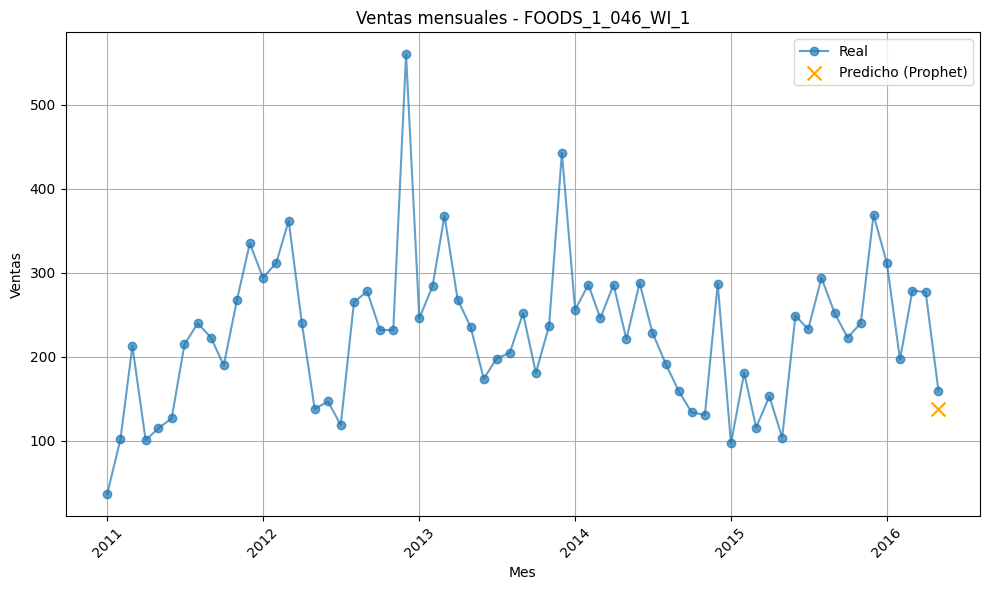

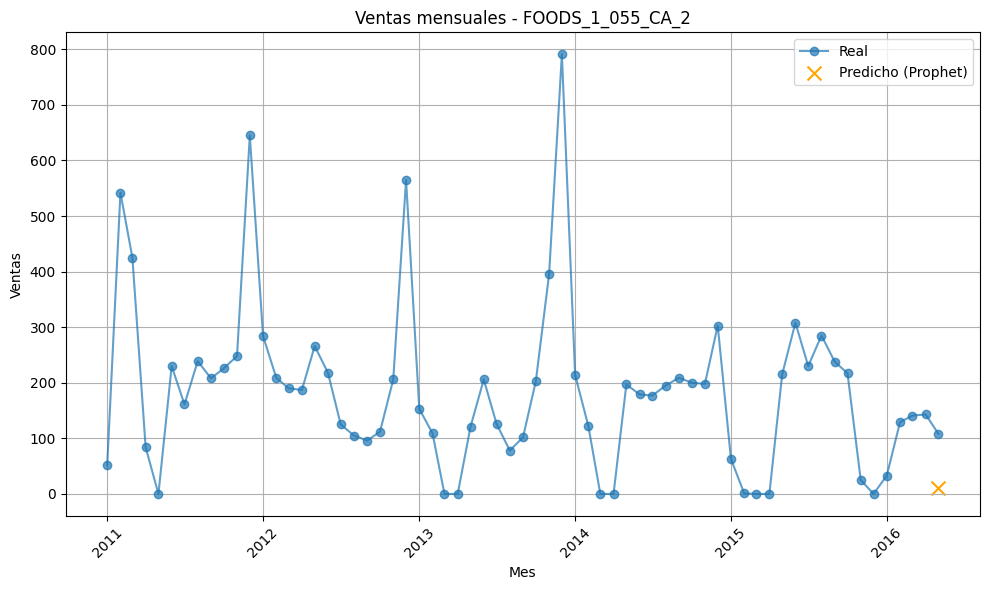

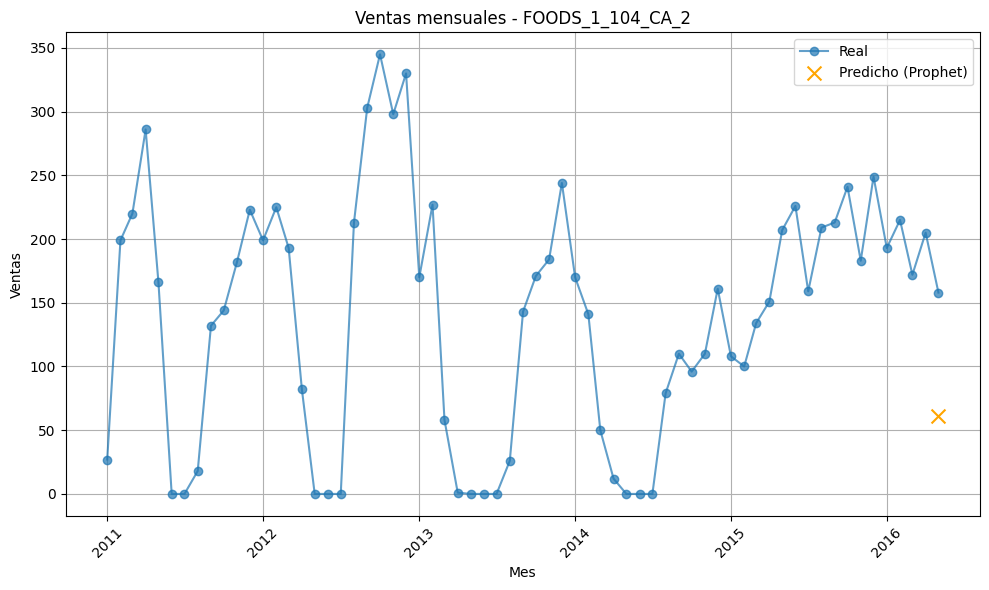

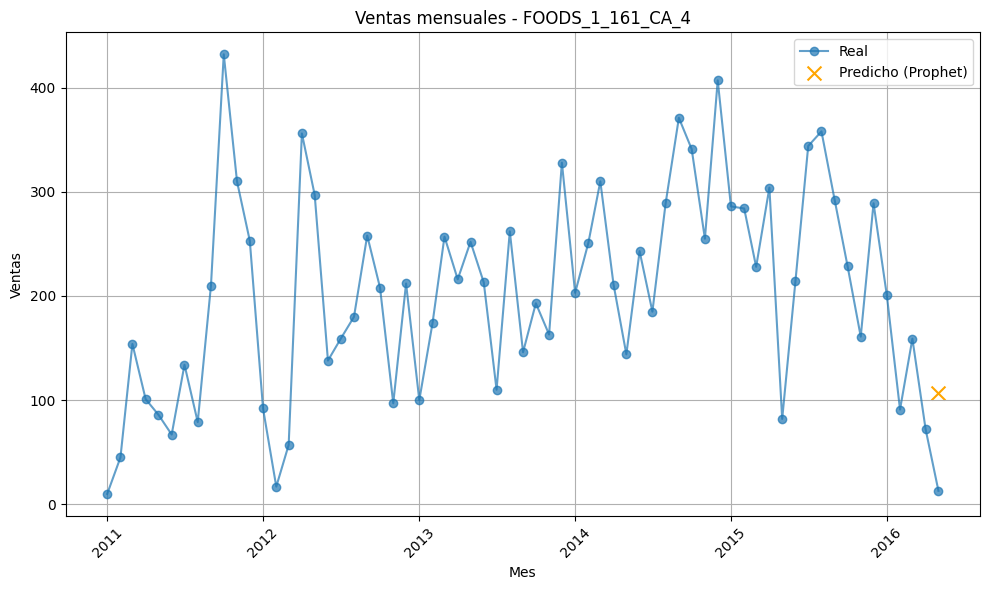

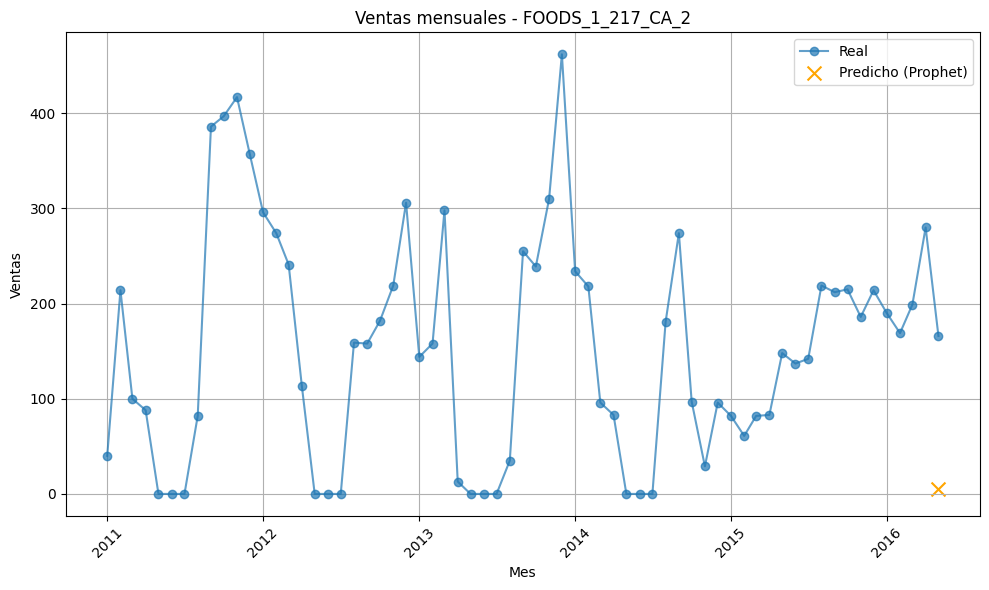


Estadísticas de las series graficadas:

FOODS_1_046_WI_1:
count     65.000000
mean     229.046154
std       87.504898
min       37.000000
25%      174.000000
50%      233.000000
75%      278.000000
max      560.000000
Name: sales, dtype: float64

FOODS_1_055_CA_2:
count     65.000000
mean     185.184615
std      153.253252
min        0.000000
25%      102.000000
50%      187.000000
75%      226.000000
max      791.000000
Name: sales, dtype: float64

FOODS_1_104_CA_2:
count     65.000000
mean     139.400000
std       96.280158
min        0.000000
25%       50.000000
50%      159.000000
75%      209.000000
max      345.000000
Name: sales, dtype: float64

FOODS_1_161_CA_4:
count     65.000000
mean     202.815385
std      100.910216
min       10.000000
25%      134.000000
50%      210.000000
75%      284.000000
max      432.000000
Name: sales, dtype: float64

FOODS_1_217_CA_2:
count     65.000000
mean     154.400000
std      119.678449
min        0.000000
25%       61.000000
50%      158.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Configurar directorio
current_dir = os.getcwd()
data_path = os.path.join(current_dir, "../data/csv_model/monthly_data_selected_final.csv")
results_path = os.path.join(current_dir, "../data/csv_model/validation_prophet_monthly.csv")

# Cargar datos
df = pd.read_csv(data_path)
df['month'] = pd.to_datetime(df['month'])
results = pd.read_csv(results_path)
results['month'] = pd.to_datetime(results['month'])

# Visualizar series reales y predicciones para las primeras 5 combinaciones
for idx, row in results.head().iterrows():
    item_store = row['item_store']
    # Dividir item_store correctamente
    store_id = item_store[-4:]  # Últimos 4 caracteres (por ejemplo, WI_1)
    item_id = item_store[:-5]  # Todo antes de los últimos 4 caracteres (por ejemplo, FOODS_1_046)
    # Filtrar datos reales
    df_item = df[(df['item_id'] == item_id) & (df['store_id'] == store_id)]
    df_item = df_item.sort_values('month')
    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(df_item['month'], df_item['sales'], label='Real', marker='o', alpha=0.7)
    plt.scatter(row['month'], row['predicted_sales'], color='orange', label='Predicho (Prophet)', marker='x', s=100)
    plt.title(f"Ventas mensuales - {item_store}")
    plt.xlabel('Mes')
    plt.ylabel('Ventas')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Imprimir estadísticas de las series graficadas
print("\nEstadísticas de las series graficadas:")
for idx, row in results.head().iterrows():
    item_store = row['item_store']
    store_id = item_store[-4:]
    item_id = item_store[:-5]
    sales = df[(df['item_id'] == item_id) & (df['store_id'] == store_id)]['sales']
    print(f"\n{item_store}:")
    print(sales.describe())

## Preparar un dataset trimestral con características externas y entrenar Prophet con estas características

In [16]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os

# Configurar directorio
current_dir = os.getcwd()
total_data_path = os.path.join(current_dir, "../data/raw/total_data.csv")
output_path = os.path.join(current_dir, "../data/csv_model/validation_prophet_quarterly.csv")

# Parámetros
chunk_size = 100_000
min_items_per_store = 20
min_sales_threshold = 0.2

# Cargar datos y agregar características externas
quarterly_data = []
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
    chunk['date'] = pd.to_datetime(chunk['date'])
    chunk['quarter'] = chunk['date'].dt.to_period('Q')
    # Agrupar por trimestre, sumar sales, y tomar el primer valor de características categóricas
    chunk_quarterly = chunk.groupby(['item_id', 'store_id', 'quarter']).agg({
        'sales': 'sum',
        'event_name_1': 'first',
        'snap_CA': 'first',
        'snap_TX': 'first',
        'snap_WI': 'first',
        'sell_price': 'mean'
    }).reset_index()
    quarterly_data.append(chunk_quarterly)

df_quarterly = pd.concat(quarterly_data, ignore_index=True)
df_quarterly = df_quarterly.groupby(['item_id', 'store_id', 'quarter']).agg({
    'sales': 'sum',
    'event_name_1': 'first',
    'snap_CA': 'first',
    'snap_TX': 'first',
    'snap_WI': 'first',
    'sell_price': 'mean'
}).reset_index()
df_quarterly['quarter'] = df_quarterly['quarter'].dt.to_timestamp()

# Calcular métricas de predictibilidad
predictability_metrics = []
for (item_id, store_id), group in df_quarterly.groupby(['item_id', 'store_id']):
    sales = group['sales']
    if len(sales) >= 8:  # Al menos 2 años para estacionalidad
        std_sales = sales.std()
        non_zero_quarters = (sales > 0).mean()
        mean_sales = sales.mean()
        try:
            decomposition = seasonal_decompose(sales, model='additive', period=4)
            seasonal_strength = np.var(decomposition.seasonal) / np.var(sales)
        except:
            seasonal_strength = 0
        combined_score = seasonal_strength * mean_sales
        predictability_metrics.append({
            'item_id': item_id,
            'store_id': store_id,
            'non_zero_quarters': non_zero_quarters,
            'mean_sales': mean_sales,
            'combined_score': combined_score
        })

metrics_df = pd.DataFrame(predictability_metrics)
filtered_metrics = metrics_df[metrics_df['non_zero_quarters'] >= min_sales_threshold]
selected_items = (
    filtered_metrics.sort_values(['store_id', 'combined_score'], ascending=[True, False])
    .groupby('store_id')
    .head(min_items_per_store)
)

# Filtrar dataset trimestral
df_selected = df_quarterly[
    df_quarterly.set_index(['item_id', 'store_id']).index.isin(
        selected_items.set_index(['item_id', 'store_id']).index
    )
]

# Entrenar Prophet con características externas
predictions = []
real_values = []
item_store_combinations = []
quarters = []

for (item_id, store_id), group in df_selected.groupby(['item_id', 'store_id']):
    prophet_df = group[['quarter', 'sales', 'event_name_1', 'snap_CA', 'snap_TX', 'snap_WI', 'sell_price']].rename(columns={'quarter': 'ds', 'sales': 'y'})
    if len(prophet_df) >= 8:
        # Transformación logarítmica
        prophet_df['y'] = np.log1p(prophet_df['y'])
        # Manejar características externas
        prophet_df['event_name_1'] = prophet_df['event_name_1'].notnull().astype(int)  # 1 si hay evento, 0 si no
        prophet_df['snap'] = prophet_df.apply(
            lambda x: x['snap_CA'] if store_id.startswith('CA') else (x['snap_TX'] if store_id.startswith('TX') else x['snap_WI']),
            axis=1
        )
        prophet_df['sell_price'] = prophet_df['sell_price'].fillna(prophet_df['sell_price'].mean())
        # Ajustar modelo Prophet
        model = Prophet(
            yearly_seasonality=True,
            weekly_seasonality=False,
            daily_seasonality=False,
            seasonality_mode='additive'  # Cambiar a aditivo para series con fluctuaciones agresivas
        )
        model.add_regressor('event_name_1')
        model.add_regressor('snap')
        model.add_regressor('sell_price')
        model.fit(prophet_df[:-1])
        # Predecir
        future = model.make_future_dataframe(periods=1, freq='Q')
        future['event_name_1'] = prophet_df['event_name_1'].iloc[-1]
        future['snap'] = prophet_df['snap'].iloc[-1]
        future['sell_price'] = prophet_df['sell_price'].iloc[-1]
        forecast = model.predict(future)
        pred_log = forecast['yhat'].iloc[-1]
        pred = np.expm1(pred_log)
        real_log = prophet_df['y'].iloc[-1]
        real = np.expm1(real_log)
        predictions.append(pred)
        real_values.append(real)
        item_store_combinations.append(f"{item_id}_{store_id}")
        quarters.append(prophet_df['ds'].iloc[-1])

# Crear DataFrame con resultados
comparison_df = pd.DataFrame({
    'item_store': item_store_combinations,
    'quarter': quarters,
    'real_sales': real_values,
    'predicted_sales': predictions
})

# Guardar resultados
comparison_df.to_csv(output_path, index=False)

# Calcular métricas
mse = mean_squared_error(real_values, predictions)
mae = mean_absolute_error(real_values, predictions)
r2 = r2_score(real_values, predictions)

print("\n Evaluación del modelo (Prophet con características externas, trimestral):")
print(f"➡️  MSE:  {mse:.2f}")
print(f"➡️  MAE:  {mae:.2f}")
print(f"➡️  R²:   {r2:.4f}")

# Imprimir primeras filas
print("\nPrimeras 5 filas de los resultados:")
print(comparison_df.head())

/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/2983245611.py:19: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/2983245611.py:19: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/2983245611.py:19: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/2983245611.py:19: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=c


📊 Evaluación del modelo (Prophet con características externas, trimestral):
➡️  MSE:  13055206837.06
➡️  MAE:  13155.80
➡️  R²:   -13672.3236

Primeras 5 filas de los resultados:
         item_store    quarter  real_sales  predicted_sales
0  FOODS_1_005_CA_2 2016-04-01       269.0       367.185540
1  FOODS_1_055_CA_2 2016-04-01       251.0       345.914370
2  FOODS_1_104_CA_2 2016-04-01       363.0       855.849235
3  FOODS_1_217_CA_2 2016-04-01       446.0       255.889735
4  FOODS_2_019_CA_1 2016-04-01       801.0       857.524940


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range(


## Visualizar series trimestrales y predicciones para diagnosticar el problema

/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/210335645.py:18: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/210335645.py:18: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/210335645.py:18: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
/var/folders/js/4g9f6f7d2vj886wxt_jkqkyc0000gn/T/ipykernel_5857/210335645.py:18: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(total_data_path, chunksize=chunk

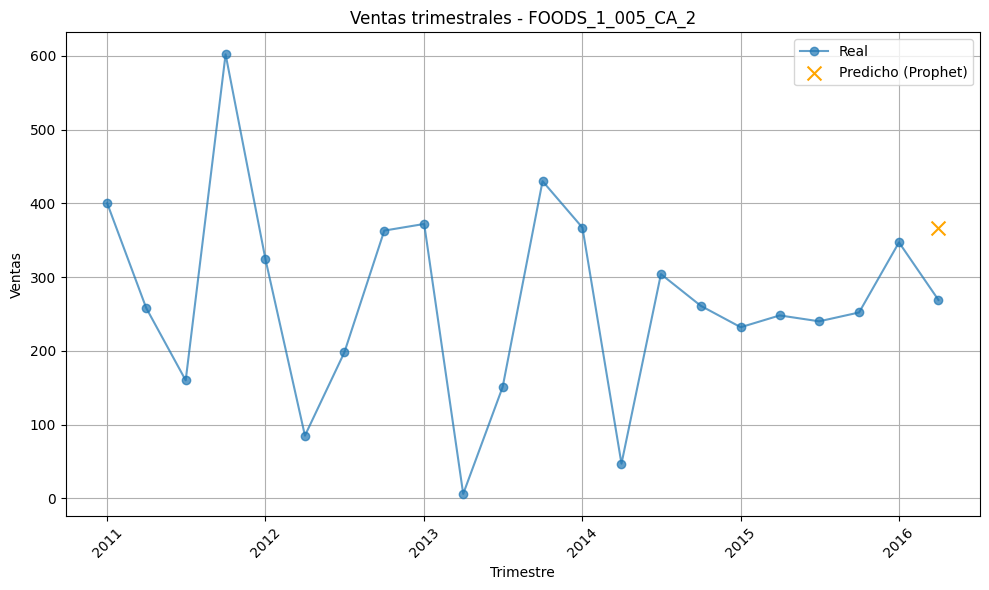

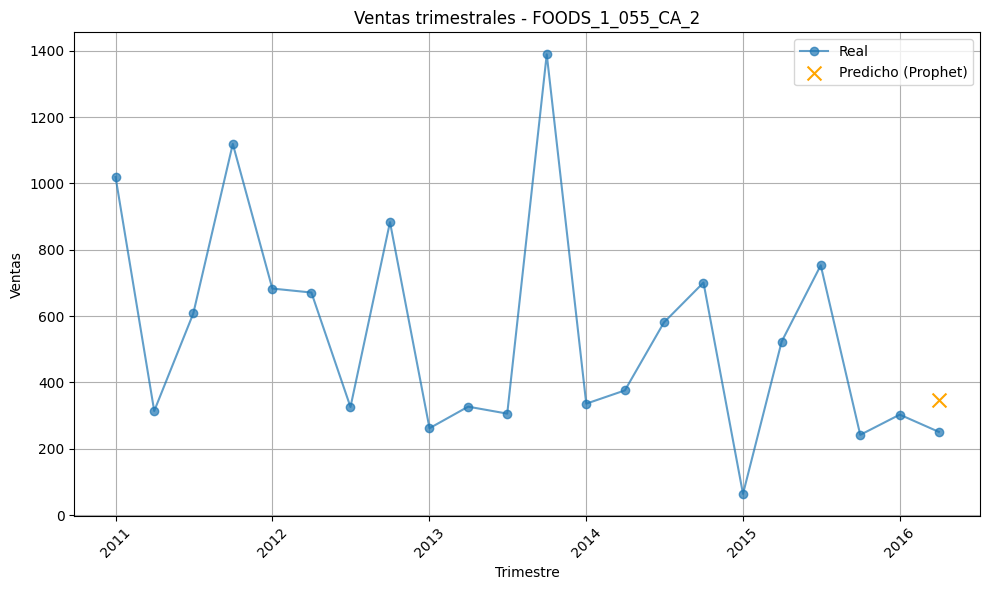

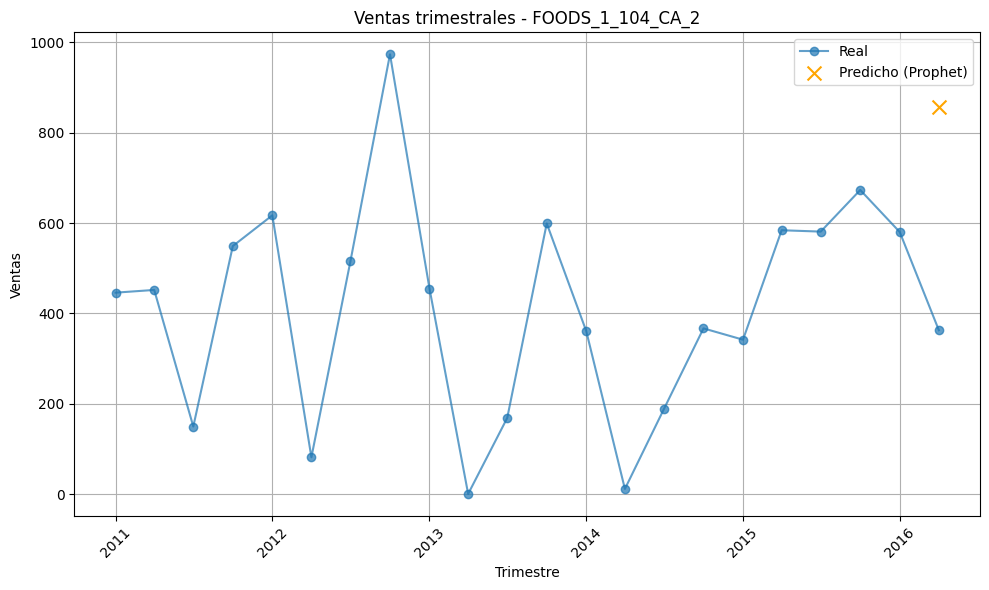

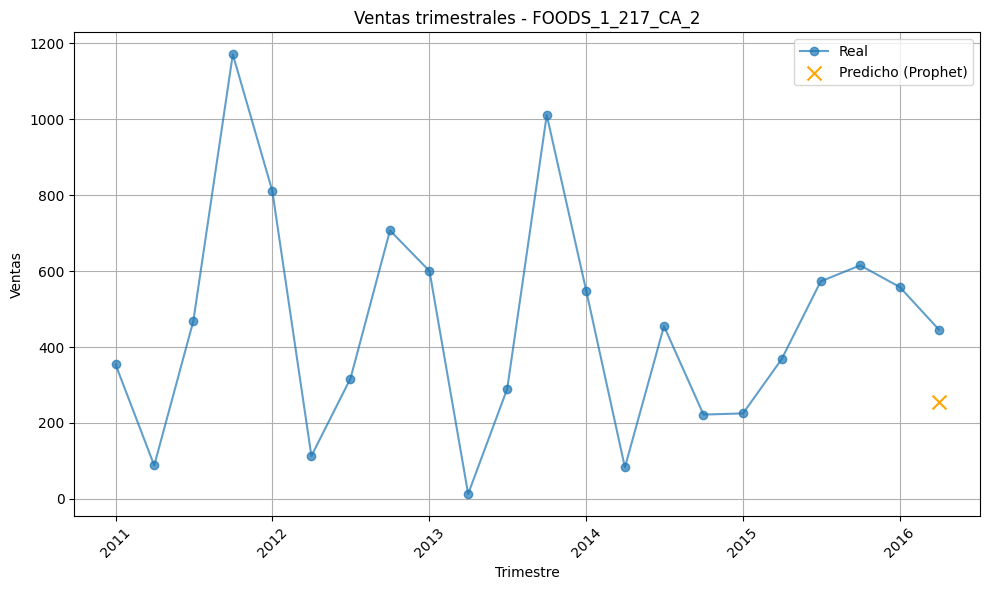

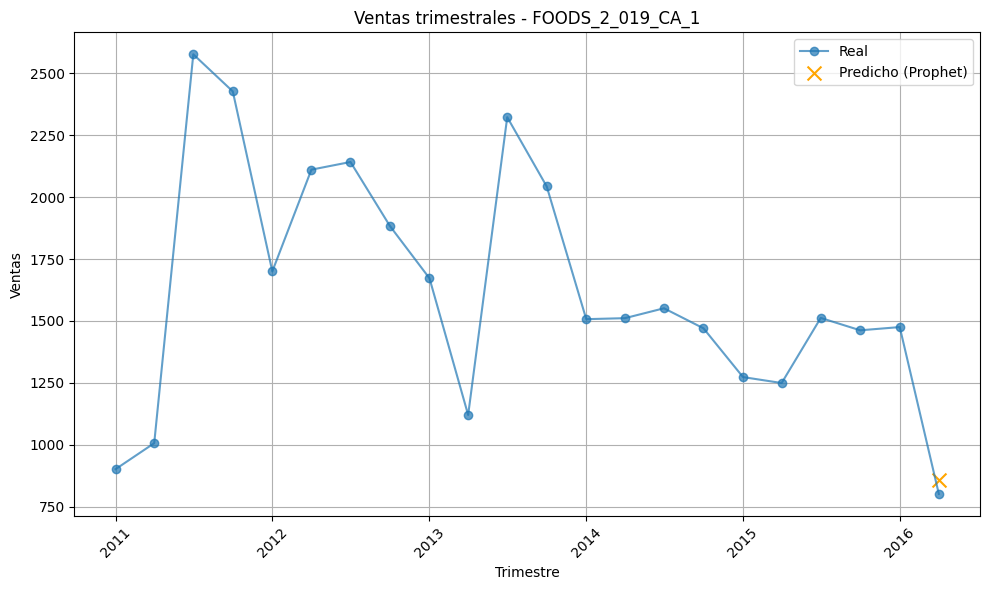


Estadísticas de las series graficadas:

FOODS_1_005_CA_2:
count     22.000000
mean     268.909091
std      134.453713
min        6.000000
25%      206.500000
50%      259.500000
75%      359.000000
max      602.000000
Name: sales, dtype: float64

FOODS_1_055_CA_2:
count      22.000000
mean      547.136364
std       332.047658
min        64.000000
25%       308.000000
50%       449.500000
75%       696.500000
max      1389.000000
Name: sales, dtype: float64

FOODS_1_104_CA_2:
count     22.000000
mean     411.863636
std      239.797989
min        1.000000
25%      227.250000
50%      449.000000
75%      580.750000
max      973.000000
Name: sales, dtype: float64

FOODS_1_217_CA_2:
count      22.000000
mean      456.181818
std       296.703096
min        13.000000
25%       241.250000
50%       450.500000
75%       593.250000
max      1171.000000
Name: sales, dtype: float64

FOODS_2_019_CA_1:
count      22.000000
mean     1623.454545
std       488.639679
min       801.000000
25%      1320

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# Configurar directorio
current_dir = os.getcwd()
total_data_path = os.path.join(current_dir, "../data/raw/total_data.csv")
results_path = os.path.join(current_dir, "../data/csv_model/validation_prophet_quarterly.csv")

# Reconstruir dataset trimestral (mismo proceso que en Paso 9)
chunk_size = 100_000
min_items_per_store = 20
min_sales_threshold = 0.2

quarterly_data = []
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
    chunk['date'] = pd.to_datetime(chunk['date'])
    chunk['quarter'] = chunk['date'].dt.to_period('Q')
    chunk_quarterly = chunk.groupby(['item_id', 'store_id', 'quarter'])['sales'].sum().reset_index()
    quarterly_data.append(chunk_quarterly)

df_quarterly = pd.concat(quarterly_data, ignore_index=True)
df_quarterly = df_quarterly.groupby(['item_id', 'store_id', 'quarter'])['sales'].sum().reset_index()
df_quarterly['quarter'] = df_quarterly['quarter'].dt.to_timestamp()

# Calcular métricas de predictibilidad
predictability_metrics = []
for (item_id, store_id), group in df_quarterly.groupby(['item_id', 'store_id']):
    sales = group['sales']
    if len(sales) >= 8:
        non_zero_quarters = (sales > 0).mean()
        mean_sales = sales.mean()
        try:
            decomposition = seasonal_decompose(sales, model='additive', period=4)
            seasonal_strength = np.var(decomposition.seasonal) / np.var(sales)
        except:
            seasonal_strength = 0
        combined_score = seasonal_strength * mean_sales
        predictability_metrics.append({
            'item_id': item_id,
            'store_id': store_id,
            'non_zero_quarters': non_zero_quarters,
            'mean_sales': mean_sales,
            'combined_score': combined_score
        })

metrics_df = pd.DataFrame(predictability_metrics)
filtered_metrics = metrics_df[metrics_df['non_zero_quarters'] >= min_sales_threshold]
selected_items = (
    filtered_metrics.sort_values(['store_id', 'combined_score'], ascending=[True, False])
    .groupby('store_id')
    .head(min_items_per_store)
)

# Filtrar dataset trimestral
df_selected = df_quarterly[
    df_quarterly.set_index(['item_id', 'store_id']).index.isin(
        selected_items.set_index(['item_id', 'store_id']).index
    )
]

# Cargar resultados de Prophet
results = pd.read_csv(results_path)
results['quarter'] = pd.to_datetime(results['quarter'])

# Visualizar series reales y predicciones
for idx, row in results.head().iterrows():
    item_store = row['item_store']
    # Dividir item_store correctamente
    parts = item_store.split('_')
    item_id = '_'.join(parts[:-2])  # Todo hasta el penúltimo elemento (por ejemplo, FOODS_1_005)
    store_id = '_'.join(parts[-2:])  # Últimos dos elementos (por ejemplo, CA_2)
    # Filtrar datos reales
    df_item = df_selected[(df_selected['item_id'] == item_id) & (df_selected['store_id'] == store_id)]
    df_item = df_item.sort_values('quarter')
    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(df_item['quarter'], df_item['sales'], label='Real', marker='o', alpha=0.7)
    plt.scatter(row['quarter'], row['predicted_sales'], color='orange', label='Predicho (Prophet)', marker='x', s=100)
    plt.title(f"Ventas trimestrales - {item_store}")
    plt.xlabel('Trimestre')
    plt.ylabel('Ventas')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Imprimir estadísticas de las series graficadas
print("\nEstadísticas de las series graficadas:")
for idx, row in results.head().iterrows():
    item_store = row['item_store']
    parts = item_store.split('_')
    item_id = '_'.join(parts[:-2])
    store_id = '_'.join(parts[-2:])
    sales = df_selected[(df_selected['item_id'] == item_id) & (df_selected['store_id'] == store_id)]['sales']
    print(f"\n{item_store}:")
    print(sales.describe())

## Volver a datos mensuales y probar un modelo más simple (ARIMA)

In [20]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os
import warnings
warnings.filterwarnings("ignore")  # Ignorar advertencias de convergencia de ARIMA

# Configurar directorio
current_dir = os.getcwd()
input_path = os.path.join(current_dir, "../data/csv_model/monthly_data_selected_final.csv")
output_path = os.path.join(current_dir, "../data/csv_model/validation_arima_monthly.csv")

# Cargar datos
df = pd.read_csv(input_path)
df['month'] = pd.to_datetime(df['month'])

# Preparar predicciones
predictions = []
real_values = []
item_store_combinations = []
months = []

for (item_id, store_id), group in df.groupby(['item_id', 'store_id']):
    sales = group['sales'].values
    if len(sales) >= 24:  # Asegurar suficientes datos para ARIMA
        # Transformación logarítmica para manejar valores atípicos
        sales_log = np.log1p(sales)
        # Ajustar modelo ARIMA
        try:
            model = ARIMA(sales_log[:-1], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
            model_fit = model.fit()
            # Predecir el próximo mes
            pred_log = model_fit.forecast(steps=1)[0]
            pred = np.expm1(pred_log)  # Invertir transformación logarítmica
            real_log = sales_log[-1]
            real = np.expm1(real_log)
            # Guardar resultados
            predictions.append(pred)
            real_values.append(real)
            item_store_combinations.append(f"{item_id}_{store_id}")
            months.append(group['month'].iloc[-1])
        except Exception as e:
            print(f"No se pudo ajustar ARIMA para {item_id}_{store_id}: {e}")
            continue

# Crear DataFrame con resultados
comparison_df = pd.DataFrame({
    'item_store': item_store_combinations,
    'month': months,
    'real_sales': real_values,
    'predicted_sales': predictions
})

# Guardar resultados
comparison_df.to_csv(output_path, index=False)

# Calcular métricas
mse = mean_squared_error(real_values, predictions)
mae = mean_absolute_error(real_values, predictions)
r2 = r2_score(real_values, predictions)

print("\n Evaluación del modelo (ARIMA, mensual):")
print(f"➡️  MSE:  {mse:.2f}")
print(f"➡️  MAE:  {mae:.2f}")
print(f"➡️  R²:   {r2:.4f}")

# Imprimir primeras filas
print("\nPrimeras 5 filas de los resultados:")
print(comparison_df.head())


📊 Evaluación del modelo (ARIMA, mensual):
➡️  MSE:  298328.52
➡️  MAE:  253.75
➡️  R²:   -0.7134

Primeras 5 filas de los resultados:
         item_store      month  real_sales  predicted_sales
0  FOODS_1_046_WI_1 2016-05-01       160.0       237.188804
1  FOODS_1_055_CA_2 2016-05-01       108.0      4036.517285
2  FOODS_1_104_CA_2 2016-05-01       158.0        30.701104
3  FOODS_1_161_CA_4 2016-05-01        13.0        68.231229
4  FOODS_1_217_CA_2 2016-05-01       166.0        20.267286


## Probar un modelo de regresión con características externas

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os

# Configurar directorio
current_dir = os.getcwd()
total_data_path = os.path.join(current_dir, "../data/raw/total_data.csv")
output_path = os.path.join(current_dir, "../data/csv_model/validation_regression_monthly.csv")

# Parámetros
chunk_size = 100_000
min_items_per_store = 20
min_sales_threshold = 0.2

# Cargar datos y agregar características externas
monthly_data = []
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
    chunk['date'] = pd.to_datetime(chunk['date'])
    chunk['month'] = chunk['date'].dt.to_period('M')
    chunk_monthly = chunk.groupby(['item_id', 'store_id', 'month']).agg({
        'sales': 'sum',
        'event_name_1': 'first',
        'snap_CA': 'first',
        'snap_TX': 'first',
        'snap_WI': 'first',
        'sell_price': 'mean'
    }).reset_index()
    monthly_data.append(chunk_monthly)

df_monthly = pd.concat(monthly_data, ignore_index=True)
df_monthly = df_monthly.groupby(['item_id', 'store_id', 'month']).agg({
    'sales': 'sum',
    'event_name_1': 'first',
    'snap_CA': 'first',
    'snap_TX': 'first',
    'snap_WI': 'first',
    'sell_price': 'mean'
}).reset_index()
df_monthly['month'] = df_monthly['month'].dt.to_timestamp()

# Calcular métricas de predictibilidad (mismo proceso que en Paso 6)
predictability_metrics = []
for (item_id, store_id), group in df_monthly.groupby(['item_id', 'store_id']):
    sales = group['sales']
    if len(sales) >= 24:
        non_zero_months = (sales > 0).mean()
        mean_sales = sales.mean()
        try:
            decomposition = seasonal_decompose(sales, model='additive', period=12)
            seasonal_strength = np.var(decomposition.seasonal) / np.var(sales)
        except:
            seasonal_strength = 0
        combined_score = seasonal_strength * mean_sales
        predictability_metrics.append({
            'item_id': item_id,
            'store_id': store_id,
            'non_zero_months': non_zero_months,
            'mean_sales': mean_sales,
            'combined_score': combined_score
        })

metrics_df = pd.DataFrame(predictability_metrics)
filtered_metrics = metrics_df[metrics_df['non_zero_months'] >= min_sales_threshold]
selected_items = (
    filtered_metrics.sort_values(['store_id', 'combined_score'], ascending=[True, False])
    .groupby('store_id')
    .head(min_items_per_store)
)

# Filtrar dataset mensual
df_selected = df_monthly[
    df_monthly.set_index(['item_id', 'store_id']).index.isin(
        selected_items.set_index(['item_id', 'store_id']).index
    )
]

# Agregar características temporales y externas
df_selected['event_name_1'] = df_selected['event_name_1'].notnull().astype(int)
df_selected['snap'] = df_selected.apply(
    lambda x: x['snap_CA'] if x['store_id'].startswith('CA') else (x['snap_TX'] if x['store_id'].startswith('TX') else x['snap_WI']),
    axis=1
)
df_selected['sell_price'] = df_selected['sell_price'].fillna(df_selected['sell_price'].mean())
df_selected['lag_1'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(1)
df_selected['lag_12'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(12)
df_selected['rolling_mean_3'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(1).rolling(window=3).mean()
df_selected['month_num'] = df_selected['month'].dt.month
df_selected['year'] = df_selected['month'].dt.year
df_selected = df_selected.dropna()

# Preparar predicciones
predictions = []
real_values = []
item_store_combinations = []
months = []

for (item_id, store_id), group in df_selected.groupby(['item_id', 'store_id']):
    # Transformación logarítmica
    group['sales_log'] = np.log1p(group['sales'])
    X = group[['event_name_1', 'snap', 'sell_price', 'lag_1', 'lag_12', 'rolling_mean_3', 'month_num', 'year']]
    y = group['sales_log']
    # Dividir datos (entrenar con todo menos el último mes)
    X_train, y_train = X.iloc[:-1], y.iloc[:-1]
    X_test = X.iloc[-1:]
    real_log = y.iloc[-1]
    real = np.expm1(real_log)
    # Ajustar modelo de regresión lineal
    try:
        model = LinearRegression()
        model.fit(X_train, y_train)
        pred_log = model.predict(X_test)[0]
        pred = np.expm1(pred_log)
        predictions.append(pred)
        real_values.append(real)
        item_store_combinations.append(f"{item_id}_{store_id}")
        months.append(group['month'].iloc[-1])
    except Exception as e:
        print(f"No se pudo ajustar regresión para {item_id}_{store_id}: {e}")
        continue

# Crear DataFrame con resultados
comparison_df = pd.DataFrame({
    'item_store': item_store_combinations,
    'month': months,
    'real_sales': real_values,
    'predicted_sales': predictions
})

# Guardar resultados
comparison_df.to_csv(output_path, index=False)

# Calcular métricas
mse = mean_squared_error(real_values, predictions)
mae = mean_absolute_error(real_values, predictions)
r2 = r2_score(real_values, predictions)

print("\n Evaluación del modelo (Regresión Lineal, mensual):")
print(f"➡️  MSE:  {mse:.2f}")
print(f"➡️  MAE:  {mae:.2f}")
print(f"➡️  R²:   {r2:.4f}")

# Imprimir primeras filas
print("\nPrimeras 5 filas de los resultados:")
print(comparison_df.head())


📊 Evaluación del modelo (Regresión Lineal, mensual):
➡️  MSE:  586758.71
➡️  MAE:  227.37
➡️  R²:   -2.3700

Primeras 5 filas de los resultados:
         item_store      month  real_sales  predicted_sales
0  FOODS_1_046_WI_1 2016-05-01       160.0       199.569167
1  FOODS_1_055_CA_2 2016-05-01       108.0        54.859152
2  FOODS_1_104_CA_2 2016-05-01       158.0       410.784728
3  FOODS_1_161_CA_4 2016-05-01        13.0       185.836009
4  FOODS_1_217_CA_2 2016-05-01       166.0       512.457814


## Visualizar predicciones de la regresión lineal y ajustar el modelo

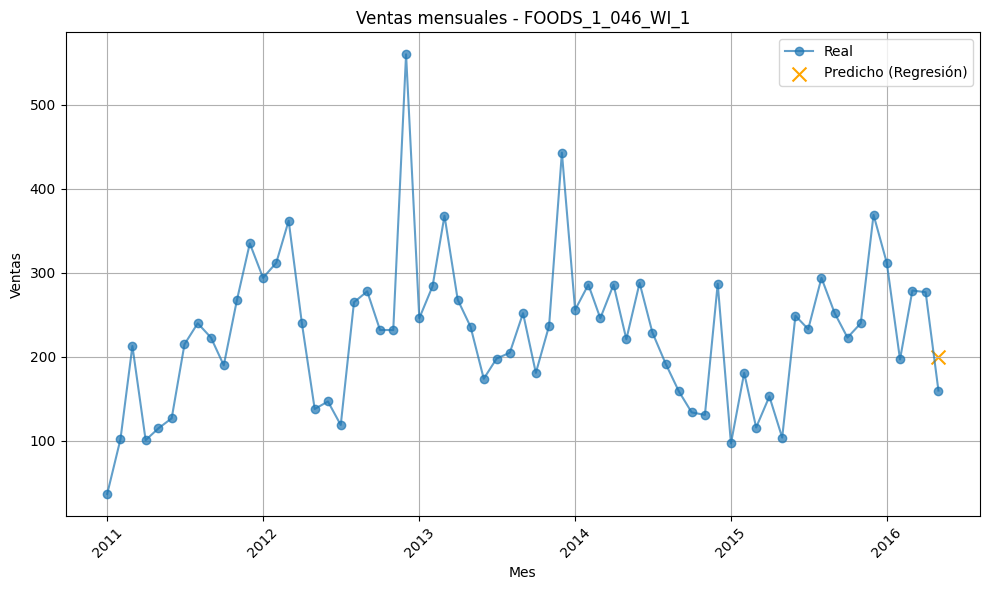

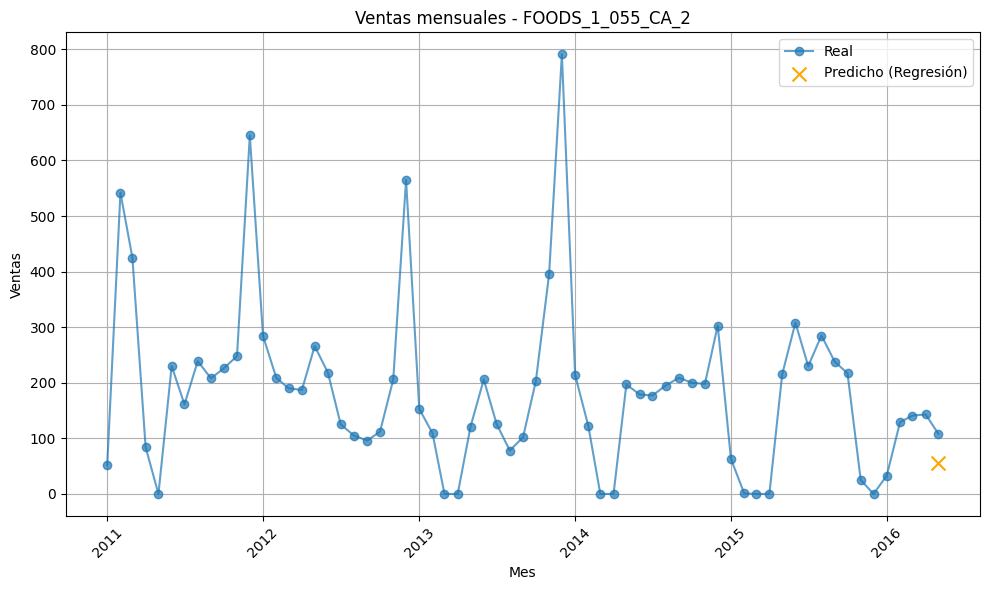

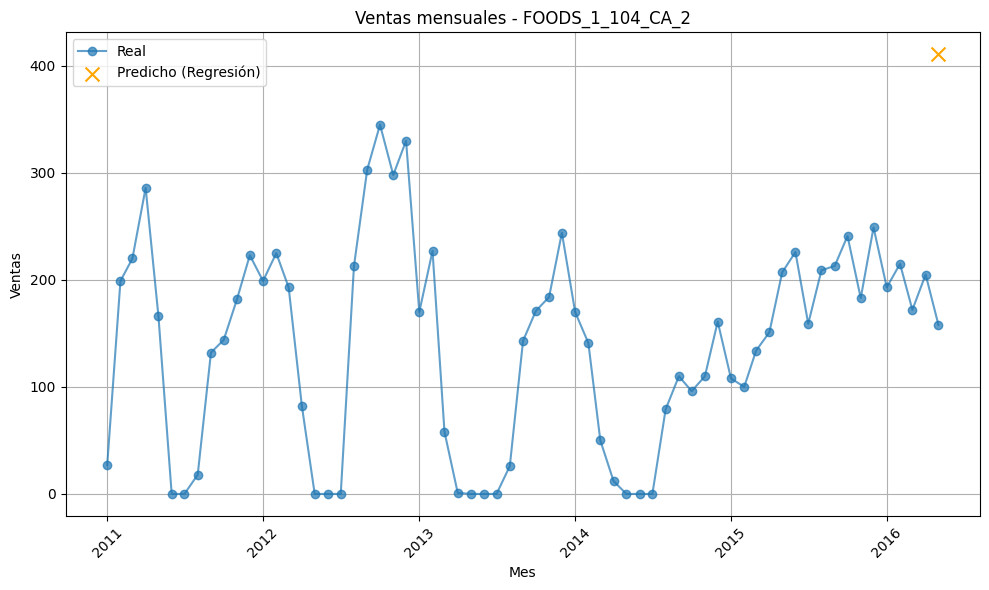

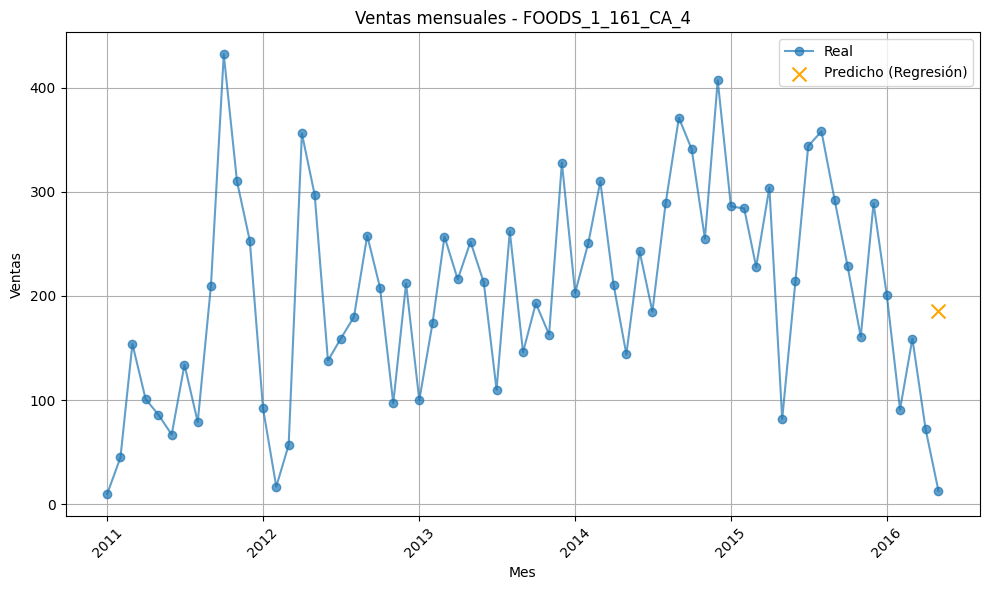

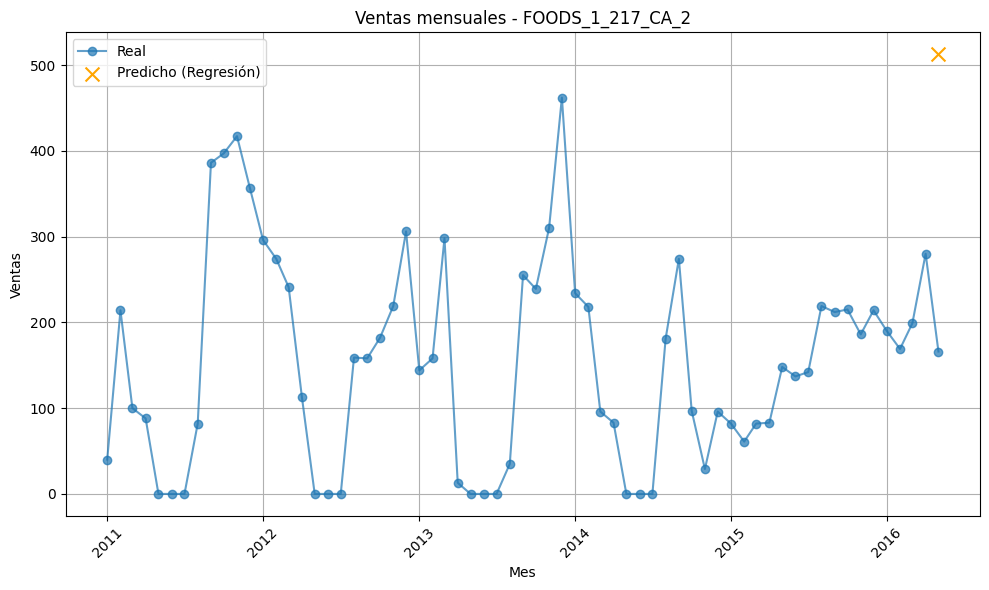


Estadísticas de las series graficadas:

FOODS_1_046_WI_1:
count     65.000000
mean     229.046154
std       87.504898
min       37.000000
25%      174.000000
50%      233.000000
75%      278.000000
max      560.000000
Name: sales, dtype: float64

FOODS_1_055_CA_2:
count     65.000000
mean     185.184615
std      153.253252
min        0.000000
25%      102.000000
50%      187.000000
75%      226.000000
max      791.000000
Name: sales, dtype: float64

FOODS_1_104_CA_2:
count     65.000000
mean     139.400000
std       96.280158
min        0.000000
25%       50.000000
50%      159.000000
75%      209.000000
max      345.000000
Name: sales, dtype: float64

FOODS_1_161_CA_4:
count     65.000000
mean     202.815385
std      100.910216
min       10.000000
25%      134.000000
50%      210.000000
75%      284.000000
max      432.000000
Name: sales, dtype: float64

FOODS_1_217_CA_2:
count     65.000000
mean     154.400000
std      119.678449
min        0.000000
25%       61.000000
50%      158.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Configurar directorio
current_dir = os.getcwd()
data_path = os.path.join(current_dir, "../data/csv_model/monthly_data_selected_final.csv")
results_path = os.path.join(current_dir, "../data/csv_model/validation_regression_monthly.csv")

# Cargar datos
df = pd.read_csv(data_path)
df['month'] = pd.to_datetime(df['month'])
results = pd.read_csv(results_path)
results['month'] = pd.to_datetime(results['month'])

# Visualizar series reales y predicciones
for idx, row in results.head().iterrows():
    item_store = row['item_store']
    parts = item_store.split('_')
    item_id = '_'.join(parts[:-2])
    store_id = '_'.join(parts[-2:])
    # Filtrar datos reales
    df_item = df[(df['item_id'] == item_id) & (df['store_id'] == store_id)]
    df_item = df_item.sort_values('month')
    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(df_item['month'], df_item['sales'], label='Real', marker='o', alpha=0.7)
    plt.scatter(row['month'], row['predicted_sales'], color='orange', label='Predicho (Regresión)', marker='x', s=100)
    plt.title(f"Ventas mensuales - {item_store}")
    plt.xlabel('Mes')
    plt.ylabel('Ventas')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Imprimir estadísticas de las series graficadas
print("\nEstadísticas de las series graficadas:")
for idx, row in results.head().iterrows():
    item_store = row['item_store']
    parts = item_store.split('_')
    item_id = '_'.join(parts[:-2])
    store_id = '_'.join(parts[-2:])
    sales = df[(df['item_id'] == item_id) & (df['store_id'] == store_id)]['sales']
    print(f"\n{item_store}:")
    print(sales.describe())

## Probar un modelo no lineal (Random Forest) para capturar relaciones complejas

In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os

# Configurar directorio
current_dir = os.getcwd()
total_data_path = os.path.join(current_dir, "../data/raw/total_data.csv")
output_path = os.path.join(current_dir, "../data/csv_model/validation_rf_monthly.csv")

# Parámetros
chunk_size = 100_000
min_items_per_store = 20
min_sales_threshold = 0.2

# Cargar datos y agregar características externas
monthly_data = []
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
    chunk['date'] = pd.to_datetime(chunk['date'])
    chunk['month'] = chunk['date'].dt.to_period('M')
    chunk_monthly = chunk.groupby(['item_id', 'store_id', 'month']).agg({
        'sales': 'sum',
        'event_name_1': 'first',
        'snap_CA': 'first',
        'snap_TX': 'first',
        'snap_WI': 'first',
        'sell_price': 'mean'
    }).reset_index()
    monthly_data.append(chunk_monthly)

df_monthly = pd.concat(monthly_data, ignore_index=True)
df_monthly = df_monthly.groupby(['item_id', 'store_id', 'month']).agg({
    'sales': 'sum',
    'event_name_1': 'first',
    'snap_CA': 'first',
    'snap_TX': 'first',
    'snap_WI': 'first',
    'sell_price': 'mean'
}).reset_index()
df_monthly['month'] = df_monthly['month'].dt.to_timestamp()

# Calcular métricas de predictibilidad (mismo proceso que en Paso 6)
from statsmodels.tsa.seasonal import seasonal_decompose
predictability_metrics = []
for (item_id, store_id), group in df_monthly.groupby(['item_id', 'store_id']):
    sales = group['sales']
    if len(sales) >= 24:
        non_zero_months = (sales > 0).mean()
        mean_sales = sales.mean()
        try:
            decomposition = seasonal_decompose(sales, model='additive', period=12)
            seasonal_strength = np.var(decomposition.seasonal) / np.var(sales)
        except:
            seasonal_strength = 0
        combined_score = seasonal_strength * mean_sales
        predictability_metrics.append({
            'item_id': item_id,
            'store_id': store_id,
            'non_zero_months': non_zero_months,
            'mean_sales': mean_sales,
            'combined_score': combined_score
        })

metrics_df = pd.DataFrame(predictability_metrics)
filtered_metrics = metrics_df[metrics_df['non_zero_months'] >= min_sales_threshold]
selected_items = (
    filtered_metrics.sort_values(['store_id', 'combined_score'], ascending=[True, False])
    .groupby('store_id')
    .head(min_items_per_store)
)

# Filtrar dataset mensual
df_selected = df_monthly[
    df_monthly.set_index(['item_id', 'store_id']).index.isin(
        selected_items.set_index(['item_id', 'store_id']).index
    )
]

# Agregar características temporales y externas
df_selected['event_name_1'] = df_selected['event_name_1'].notnull().astype(int)
df_selected['snap'] = df_selected.apply(
    lambda x: x['snap_CA'] if x['store_id'].startswith('CA') else (x['snap_TX'] if x['store_id'].startswith('TX') else x['snap_WI']),
    axis=1
)
df_selected['sell_price'] = df_selected['sell_price'].fillna(df_selected['sell_price'].mean())
df_selected['lag_1'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(1)
df_selected['lag_12'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(12)
df_selected['rolling_mean_3'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(1).rolling(window=3).mean()
df_selected['month_num'] = df_selected['month'].dt.month
df_selected['year'] = df_selected['month'].dt.year
df_selected = df_selected.dropna()

# Preparar predicciones
predictions = []
real_values = []
item_store_combinations = []
months = []

for (item_id, store_id), group in df_selected.groupby(['item_id', 'store_id']):
    # Transformación logarítmica
    group['sales_log'] = np.log1p(group['sales'])
    X = group[['event_name_1', 'snap', 'sell_price', 'lag_1', 'lag_12', 'rolling_mean_3', 'month_num', 'year']]
    y = group['sales_log']
    # Dividir datos (entrenar con todo menos el último mes)
    X_train, y_train = X.iloc[:-1], y.iloc[:-1]
    X_test = X.iloc[-1:]
    real_log = y.iloc[-1]
    real = np.expm1(real_log)
    # Ajustar modelo Random Forest
    try:
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        pred_log = model.predict(X_test)[0]
        pred = np.expm1(pred_log)
        predictions.append(pred)
        real_values.append(real)
        item_store_combinations.append(f"{item_id}_{store_id}")
        months.append(group['month'].iloc[-1])
    except Exception as e:
        print(f"No se pudo ajustar Random Forest para {item_id}_{store_id}: {e}")
        continue

# Crear DataFrame con resultados
comparison_df = pd.DataFrame({
    'item_store': item_store_combinations,
    'month': months,
    'real_sales': real_values,
    'predicted_sales': predictions
})

# Guardar resultados
comparison_df.to_csv(output_path, index=False)

# Calcular métricas
mse = mean_squared_error(real_values, predictions)
mae = mean_absolute_error(real_values, predictions)
r2 = r2_score(real_values, predictions)

print("\n Evaluación del modelo (Random Forest, mensual):")
print(f"➡️  MSE:  {mse:.2f}")
print(f"➡️  MAE:  {mae:.2f}")
print(f"➡️  R²:   {r2:.4f}")

# Imprimir primeras filas
print("\nPrimeras 5 filas de los resultados:")
print(comparison_df.head())


📊 Evaluación del modelo (Random Forest, mensual):
➡️  MSE:  52269.30
➡️  MAE:  151.85
➡️  R²:   0.6998

Primeras 5 filas de los resultados:
         item_store      month  real_sales  predicted_sales
0  FOODS_1_046_WI_1 2016-05-01       160.0       209.812814
1  FOODS_1_055_CA_2 2016-05-01       108.0       122.255454
2  FOODS_1_104_CA_2 2016-05-01       158.0       198.724558
3  FOODS_1_161_CA_4 2016-05-01        13.0       123.641114
4  FOODS_1_217_CA_2 2016-05-01       166.0       150.564840


## Optimizar Random Forest y manejar series con ventas bajas

Optimizar Random Forest ajustando hiperparámetros (por ejemplo, número de árboles, profundidad máxima).

Excluir series con ventas muy bajas (por ejemplo, mediana < 50) para reducir el impacto de errores relativos extremos.

Reentrenar el modelo y evaluar las métricas.

In [24]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os
from statsmodels.tsa.seasonal import seasonal_decompose

# Configurar directorio
current_dir = os.getcwd()
total_data_path = os.path.join(current_dir, "../data/raw/total_data.csv")
output_path = os.path.join(current_dir, "../data/csv_model/validation_rf_optimized_monthly.csv")

# Parámetros
chunk_size = 100_000
min_items_per_store = 20
min_sales_threshold = 0.2
min_median_sales = 50  # Excluir series con mediana < 50

# Cargar datos y agregar características externas
monthly_data = []
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
    chunk['date'] = pd.to_datetime(chunk['date'])
    chunk['month'] = chunk['date'].dt.to_period('M')
    chunk_monthly = chunk.groupby(['item_id', 'store_id', 'month']).agg({
        'sales': 'sum',
        'event_name_1': 'first',
        'snap_CA': 'first',
        'snap_TX': 'first',
        'snap_WI': 'first',
        'sell_price': 'mean'
    }).reset_index()
    monthly_data.append(chunk_monthly)

df_monthly = pd.concat(monthly_data, ignore_index=True)
df_monthly = df_monthly.groupby(['item_id', 'store_id', 'month']).agg({
    'sales': 'sum',
    'event_name_1': 'first',
    'snap_CA': 'first',
    'snap_TX': 'first',
    'snap_WI': 'first',
    'sell_price': 'mean'
}).reset_index()
df_monthly['month'] = df_monthly['month'].dt.to_timestamp()

# Calcular métricas de predictibilidad
predictability_metrics = []
for (item_id, store_id), group in df_monthly.groupby(['item_id', 'store_id']):
    sales = group['sales']
    if len(sales) >= 24:
        non_zero_months = (sales > 0).mean()
        mean_sales = sales.mean()
        median_sales = sales.median()
        try:
            decomposition = seasonal_decompose(sales, model='additive', period=12)
            seasonal_strength = np.var(decomposition.seasonal) / np.var(sales)
        except:
            seasonal_strength = 0
        combined_score = seasonal_strength * mean_sales
        predictability_metrics.append({
            'item_id': item_id,
            'store_id': store_id,
            'non_zero_months': non_zero_months,
            'mean_sales': mean_sales,
            'median_sales': median_sales,
            'combined_score': combined_score
        })

metrics_df = pd.DataFrame(predictability_metrics)
filtered_metrics = metrics_df[
    (metrics_df['non_zero_months'] >= min_sales_threshold) &
    (metrics_df['median_sales'] >= min_median_sales)
]
selected_items = (
    filtered_metrics.sort_values(['store_id', 'combined_score'], ascending=[True, False])
    .groupby('store_id')
    .head(min_items_per_store)
)

# Filtrar dataset mensual
df_selected = df_monthly[
    df_monthly.set_index(['item_id', 'store_id']).index.isin(
        selected_items.set_index(['item_id', 'store_id']).index
    )
]

# Agregar características temporales y externas
df_selected['event_name_1'] = df_selected['event_name_1'].notnull().astype(int)
df_selected['snap'] = df_selected.apply(
    lambda x: x['snap_CA'] if x['store_id'].startswith('CA') else (x['snap_TX'] if x['store_id'].startswith('TX') else x['snap_WI']),
    axis=1
)
df_selected['sell_price'] = df_selected['sell_price'].fillna(df_selected['sell_price'].mean())
df_selected['lag_1'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(1)
df_selected['lag_12'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(12)
df_selected['rolling_mean_3'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(1).rolling(window=3).mean()
df_selected['month_num'] = df_selected['month'].dt.month
df_selected['year'] = df_selected['month'].dt.year
df_selected = df_selected.dropna()

# Preparar predicciones
predictions = []
real_values = []
item_store_combinations = []
months = []

for (item_id, store_id), group in df_selected.groupby(['item_id', 'store_id']):
    # Transformación logarítmica
    group['sales_log'] = np.log1p(group['sales'])
    X = group[['event_name_1', 'snap', 'sell_price', 'lag_1', 'lag_12', 'rolling_mean_3', 'month_num', 'year']]
    y = group['sales_log']
    # Dividir datos (entrenar con todo menos el último mes)
    X_train, y_train = X.iloc[:-1], y.iloc[:-1]
    X_test = X.iloc[-1:]
    real_log = y.iloc[-1]
    real = np.expm1(real_log)
    # Ajustar modelo Random Forest con hiperparámetros optimizados
    try:
        model = RandomForestRegressor(
            n_estimators=200,  # Más árboles
            max_depth=10,      # Limitar profundidad para evitar sobreajuste
            min_samples_split=5,
            random_state=42
        )
        model.fit(X_train, y_train)
        pred_log = model.predict(X_test)[0]
        pred = np.expm1(pred_log)
        predictions.append(pred)
        real_values.append(real)
        item_store_combinations.append(f"{item_id}_{store_id}")
        months.append(group['month'].iloc[-1])
    except Exception as e:
        print(f"No se pudo ajustar Random Forest para {item_id}_{store_id}: {e}")
        continue

# Crear DataFrame con resultados
comparison_df = pd.DataFrame({
    'item_store': item_store_combinations,
    'month': months,
    'real_sales': real_values,
    'predicted_sales': predictions
})

# Guardar resultados
comparison_df.to_csv(output_path, index=False)

# Calcular métricas
mse = mean_squared_error(real_values, predictions)
mae = mean_absolute_error(real_values, predictions)
r2 = r2_score(real_values, predictions)

print("\n Evaluación del modelo (Random Forest Optimizado, mensual):")
print(f"➡️  MSE:  {mse:.2f}")
print(f"➡️  MAE:  {mae:.2f}")
print(f"➡️  R²:   {r2:.4f}")

# Imprimir primeras filas
print("\nPrimeras 5 filas de los resultados:")
print(comparison_df.head())


📊 Evaluación del modelo (Random Forest Optimizado, mensual):
➡️  MSE:  49962.53
➡️  MAE:  146.70
➡️  R²:   0.7141

Primeras 5 filas de los resultados:
         item_store      month  real_sales  predicted_sales
0  FOODS_1_046_WI_1 2016-05-01       160.0       216.733306
1  FOODS_1_055_CA_2 2016-05-01       108.0       128.921054
2  FOODS_1_104_CA_2 2016-05-01       158.0       196.983287
3  FOODS_1_161_CA_4 2016-05-01        13.0       121.443872
4  FOODS_1_217_CA_2 2016-05-01       166.0       149.415001


## Visualizar predicciones del Random Forest optimizado y analizar errores

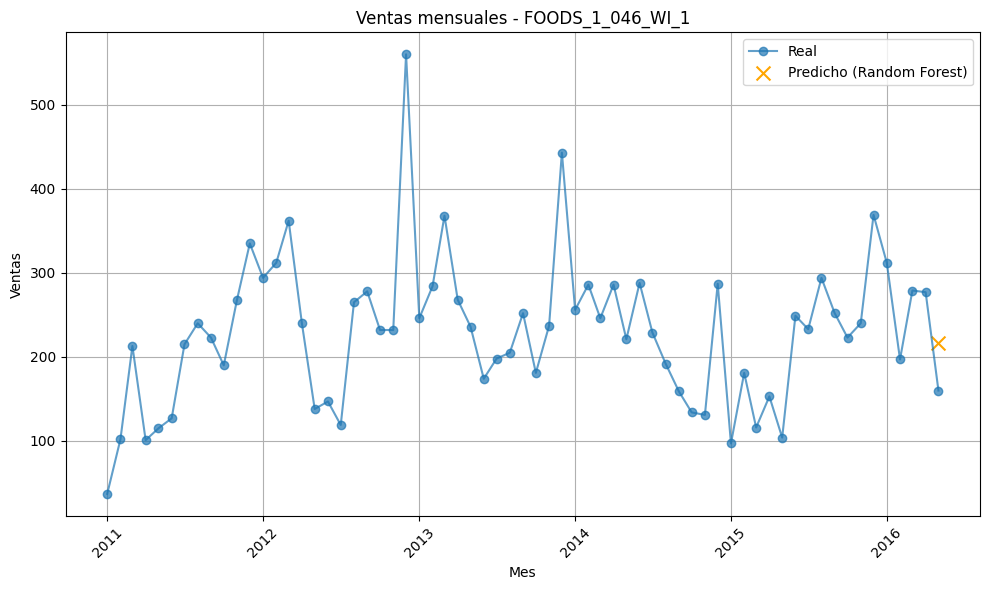

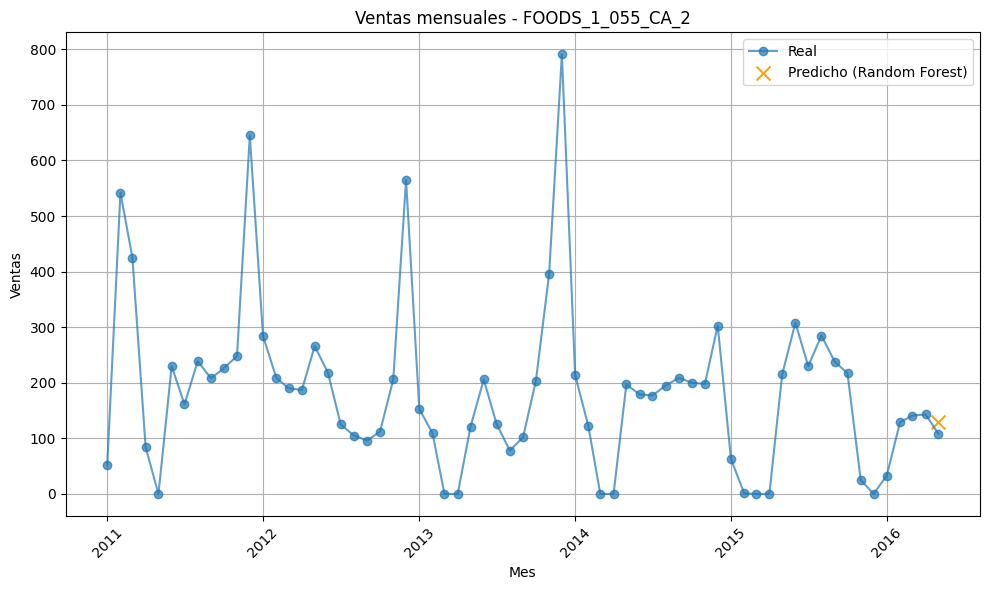

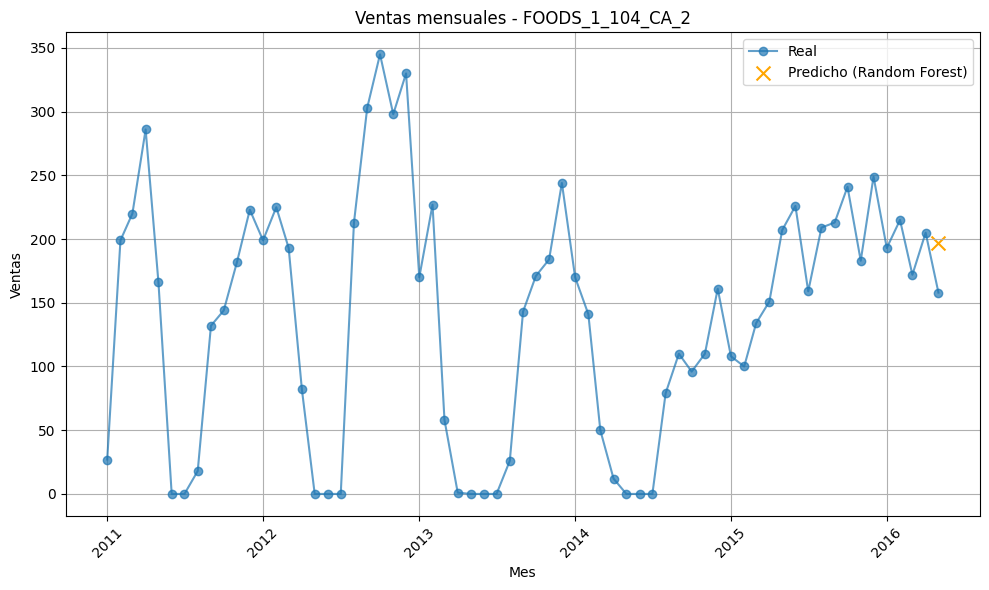

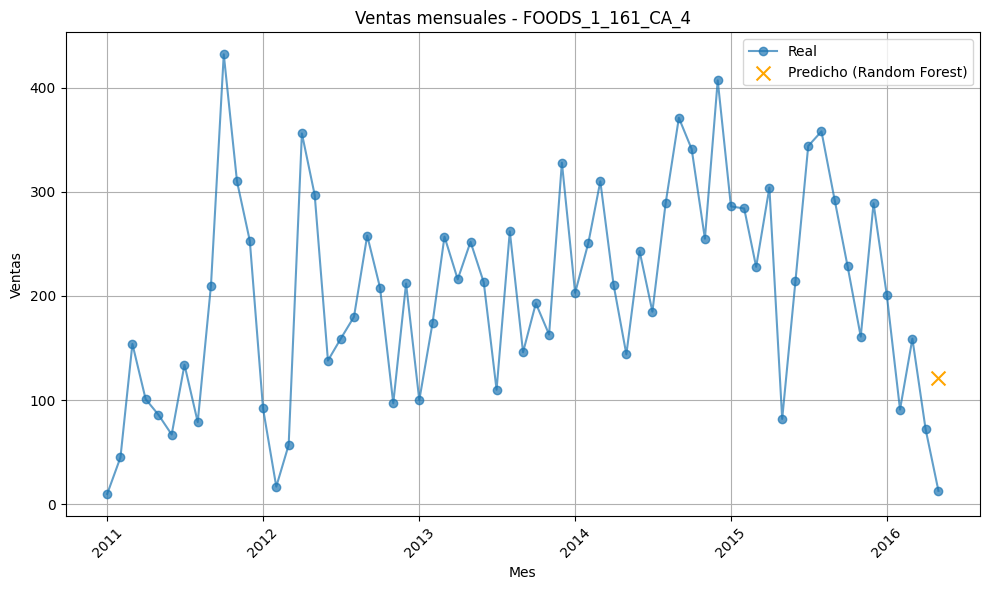

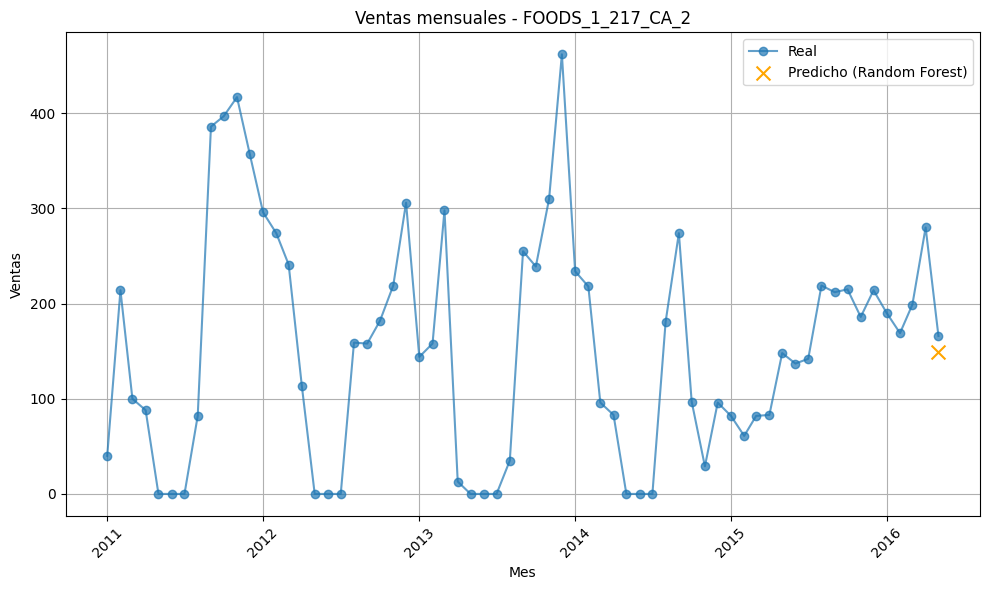


Estadísticas de las series graficadas:

FOODS_1_046_WI_1:
count     65.000000
mean     229.046154
std       87.504898
min       37.000000
25%      174.000000
50%      233.000000
75%      278.000000
max      560.000000
Name: sales, dtype: float64

FOODS_1_055_CA_2:
count     65.000000
mean     185.184615
std      153.253252
min        0.000000
25%      102.000000
50%      187.000000
75%      226.000000
max      791.000000
Name: sales, dtype: float64

FOODS_1_104_CA_2:
count     65.000000
mean     139.400000
std       96.280158
min        0.000000
25%       50.000000
50%      159.000000
75%      209.000000
max      345.000000
Name: sales, dtype: float64

FOODS_1_161_CA_4:
count     65.000000
mean     202.815385
std      100.910216
min       10.000000
25%      134.000000
50%      210.000000
75%      284.000000
max      432.000000
Name: sales, dtype: float64

FOODS_1_217_CA_2:
count     65.000000
mean     154.400000
std      119.678449
min        0.000000
25%       61.000000
50%      158.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Configurar directorio
current_dir = os.getcwd()
data_path = os.path.join(current_dir, "../data/csv_model/monthly_data_selected_final.csv")
results_path = os.path.join(current_dir, "../data/csv_model/validation_rf_optimized_monthly.csv")

# Cargar datos
df = pd.read_csv(data_path)
df['month'] = pd.to_datetime(df['month'])
results = pd.read_csv(results_path)
results['month'] = pd.to_datetime(results['month'])

# Visualizar series reales y predicciones
for idx, row in results.head().iterrows():
    item_store = row['item_store']
    parts = item_store.split('_')
    item_id = '_'.join(parts[:-2])
    store_id = '_'.join(parts[-2:])
    # Filtrar datos reales
    df_item = df[(df['item_id'] == item_id) & (df['store_id'] == store_id)]
    df_item = df_item.sort_values('month')
    # Graficar
    plt.figure(figsize=(10, 6))
    plt.plot(df_item['month'], df_item['sales'], label='Real', marker='o', alpha=0.7)
    plt.scatter(row['month'], row['predicted_sales'], color='orange', label='Predicho (Random Forest)', marker='x', s=100)
    plt.title(f"Ventas mensuales - {item_store}")
    plt.xlabel('Mes')
    plt.ylabel('Ventas')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Imprimir estadísticas de las series graficadas
print("\nEstadísticas de las series graficadas:")
for idx, row in results.head().iterrows():
    item_store = row['item_store']
    parts = item_store.split('_')
    item_id = '_'.join(parts[:-2])
    store_id = '_'.join(parts[-2:])
    sales = df[(df['item_id'] == item_id) & (df['store_id'] == store_id)]['sales']
    print(f"\n{item_store}:")
    print(sales.describe())

## Ajustar el filtro de ventas bajas y finalizar el modelo

In [26]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os
from statsmodels.tsa.seasonal import seasonal_decompose

# Configurar directorio
current_dir = os.getcwd()
total_data_path = os.path.join(current_dir, "../data/raw/total_data.csv")
output_path = os.path.join(current_dir, "../data/csv_model/validation_rf_final_monthly.csv")

# Parámetros
chunk_size = 100_000
min_items_per_store = 20
min_sales_threshold = 0.2
min_median_sales = 100  # Ajustar filtro para excluir series con mediana < 100

# Cargar datos y agregar características externas
monthly_data = []
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
    chunk['date'] = pd.to_datetime(chunk['date'])
    chunk['month'] = chunk['date'].dt.to_period('M')
    chunk_monthly = chunk.groupby(['item_id', 'store_id', 'month']).agg({
        'sales': 'sum',
        'event_name_1': 'first',
        'snap_CA': 'first',
        'snap_TX': 'first',
        'snap_WI': 'first',
        'sell_price': 'mean'
    }).reset_index()
    monthly_data.append(chunk_monthly)

df_monthly = pd.concat(monthly_data, ignore_index=True)
df_monthly = df_monthly.groupby(['item_id', 'store_id', 'month']).agg({
    'sales': 'sum',
    'event_name_1': 'first',
    'snap_CA': 'first',
    'snap_TX': 'first',
    'snap_WI': 'first',
    'sell_price': 'mean'
}).reset_index()
df_monthly['month'] = df_monthly['month'].dt.to_timestamp()

# Calcular métricas de predictibilidad
predictability_metrics = []
for (item_id, store_id), group in df_monthly.groupby(['item_id', 'store_id']):
    sales = group['sales']
    if len(sales) >= 24:
        non_zero_months = (sales > 0).mean()
        mean_sales = sales.mean()
        median_sales = sales.median()
        try:
            decomposition = seasonal_decompose(sales, model='additive', period=12)
            seasonal_strength = np.var(decomposition.seasonal) / np.var(sales)
        except:
            seasonal_strength = 0
        combined_score = seasonal_strength * mean_sales
        predictability_metrics.append({
            'item_id': item_id,
            'store_id': store_id,
            'non_zero_months': non_zero_months,
            'mean_sales': mean_sales,
            'median_sales': median_sales,
            'combined_score': combined_score
        })

metrics_df = pd.DataFrame(predictability_metrics)
filtered_metrics = metrics_df[
    (metrics_df['non_zero_months'] >= min_sales_threshold) &
    (metrics_df['median_sales'] >= min_median_sales)
]
selected_items = (
    filtered_metrics.sort_values(['store_id', 'combined_score'], ascending=[True, False])
    .groupby('store_id')
    .head(min_items_per_store)
)

# Filtrar dataset mensual
df_selected = df_monthly[
    df_monthly.set_index(['item_id', 'store_id']).index.isin(
        selected_items.set_index(['item_id', 'store_id']).index
    )
]

# Agregar características temporales y externas
df_selected['event_name_1'] = df_selected['event_name_1'].notnull().astype(int)
df_selected['snap'] = df_selected.apply(
    lambda x: x['snap_CA'] if x['store_id'].startswith('CA') else (x['snap_TX'] if x['store_id'].startswith('TX') else x['snap_WI']),
    axis=1
)
df_selected['sell_price'] = df_selected['sell_price'].fillna(df_selected['sell_price'].mean())
df_selected['lag_1'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(1)
df_selected['lag_12'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(12)
df_selected['rolling_mean_3'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(1).rolling(window=3).mean()
df_selected['month_num'] = df_selected['month'].dt.month
df_selected['year'] = df_selected['month'].dt.year
df_selected = df_selected.dropna()

# Preparar predicciones
predictions = []
real_values = []
item_store_combinations = []
months = []

for (item_id, store_id), group in df_selected.groupby(['item_id', 'store_id']):
    # Transformación logarítmica
    group['sales_log'] = np.log1p(group['sales'])
    X = group[['event_name_1', 'snap', 'sell_price', 'lag_1', 'lag_12', 'rolling_mean_3', 'month_num', 'year']]
    y = group['sales_log']
    # Dividir datos (entrenar con todo menos el último mes)
    X_train, y_train = X.iloc[:-1], y.iloc[:-1]
    X_test = X.iloc[-1:]
    real_log = y.iloc[-1]
    real = np.expm1(real_log)
    # Ajustar modelo Random Forest
    try:
        model = RandomForestRegressor(
            n_estimators=200,
            max_depth=10,
            min_samples_split=5,
            random_state=42
        )
        model.fit(X_train, y_train)
        pred_log = model.predict(X_test)[0]
        pred = np.expm1(pred_log)
        predictions.append(pred)
        real_values.append(real)
        item_store_combinations.append(f"{item_id}_{store_id}")
        months.append(group['month'].iloc[-1])
    except Exception as e:
        print(f"No se pudo ajustar Random Forest para {item_id}_{store_id}: {e}")
        continue

# Crear DataFrame con resultados
comparison_df = pd.DataFrame({
    'item_store': item_store_combinations,
    'month': months,
    'real_sales': real_values,
    'predicted_sales': predictions
})

# Guardar resultados
comparison_df.to_csv(output_path, index=False)

# Calcular métricas
mse = mean_squared_error(real_values, predictions)
mae = mean_absolute_error(real_values, predictions)
r2 = r2_score(real_values, predictions)

print("\n Evaluación del modelo (Random Forest Final, mensual):")
print(f"➡️  MSE:  {mse:.2f}")
print(f"➡️  MAE:  {mae:.2f}")
print(f"➡️  R²:   {r2:.4f}")

# Imprimir primeras filas
print("\nPrimeras 5 filas de los resultados:")
print(comparison_df.head())


📊 Evaluación del modelo (Random Forest Final, mensual):
➡️  MSE:  50050.83
➡️  MAE:  147.32
➡️  R²:   0.7121

Primeras 5 filas de los resultados:
         item_store      month  real_sales  predicted_sales
0  FOODS_1_046_WI_1 2016-05-01       160.0       216.733306
1  FOODS_1_055_CA_2 2016-05-01       108.0       128.921054
2  FOODS_1_104_CA_2 2016-05-01       158.0       196.983287
3  FOODS_1_161_CA_4 2016-05-01        13.0       121.443872
4  FOODS_1_217_CA_2 2016-05-01       166.0       149.415001


#### Vamos a calcular la mediana de FOODS_1_161_CA_4 para confirmar por qué no fue excluida por el filtro.

In [28]:
import pandas as pd
import os

# Configurar directorio
current_dir = os.getcwd()
data_path = os.path.join(current_dir, "../data/csv_model/monthly_data_selected_final.csv")

# Cargar datos
df = pd.read_csv(data_path)
df['month'] = pd.to_datetime(df['month'])

# Calcular medianas por combinación
median_sales = df.groupby(['item_id', 'store_id'])['sales'].median().reset_index()
median_sales = median_sales.rename(columns={'sales': 'median_sales'})

# Crear columna item_store para filtrar
median_sales['item_store'] = median_sales['item_id'] + '_' + median_sales['store_id']

# Mostrar medianas para las primeras 5 combinaciones
print("\nMedianas de las primeras 5 combinaciones:")
print(median_sales[median_sales['item_store'].isin([
    'FOODS_1_046_WI_1',
    'FOODS_1_055_CA_2',
    'FOODS_1_104_CA_2',
    'FOODS_1_161_CA_4',
    'FOODS_1_217_CA_2'
])])

# Mostrar estadísticas completas de FOODS_1_161_CA_4
print("\nEstadísticas de FOODS_1_161_CA_4:")
sales_161 = df[(df['item_id'] == 'FOODS_1_161') & (df['store_id'] == 'CA_4')]['sales']
print(sales_161.describe())


Medianas de las primeras 5 combinaciones:
       item_id store_id  median_sales        item_store
0  FOODS_1_046     WI_1         233.0  FOODS_1_046_WI_1
1  FOODS_1_055     CA_2         187.0  FOODS_1_055_CA_2
2  FOODS_1_104     CA_2         159.0  FOODS_1_104_CA_2
3  FOODS_1_161     CA_4         210.0  FOODS_1_161_CA_4
4  FOODS_1_217     CA_2         158.0  FOODS_1_217_CA_2

Estadísticas de FOODS_1_161_CA_4:
count     65.000000
mean     202.815385
std      100.910216
min       10.000000
25%      134.000000
50%      210.000000
75%      284.000000
max      432.000000
Name: sales, dtype: float64


## Ajustar el filtro para excluir series con valores atípicos bajos

In [29]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os
from statsmodels.tsa.seasonal import seasonal_decompose

# Configurar directorio
current_dir = os.getcwd()
total_data_path = os.path.join(current_dir, "../data/raw/total_data.csv")
output_path = os.path.join(current_dir, "../data/csv_model/validation_rf_final_adjusted_monthly.csv")

# Parámetros
chunk_size = 100_000
min_items_per_store = 20
min_sales_threshold = 0.2
min_median_sales = 100  # Mantener el filtro anterior
min_sales_value = 20    # Excluir series con mínimo < 20
max_cv = 1.0            # Excluir series con coeficiente de variación > 1

# Cargar datos y agregar características externas
monthly_data = []
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
    chunk['date'] = pd.to_datetime(chunk['date'])
    chunk['month'] = chunk['date'].dt.to_period('M')
    chunk_monthly = chunk.groupby(['item_id', 'store_id', 'month']).agg({
        'sales': 'sum',
        'event_name_1': 'first',
        'snap_CA': 'first',
        'snap_TX': 'first',
        'snap_WI': 'first',
        'sell_price': 'mean'
    }).reset_index()
    monthly_data.append(chunk_monthly)

df_monthly = pd.concat(monthly_data, ignore_index=True)
df_monthly = df_monthly.groupby(['item_id', 'store_id', 'month']).agg({
    'sales': 'sum',
    'event_name_1': 'first',
    'snap_CA': 'first',
    'snap_TX': 'first',
    'snap_WI': 'first',
    'sell_price': 'mean'
}).reset_index()
df_monthly['month'] = df_monthly['month'].dt.to_timestamp()

# Calcular métricas de predictibilidad
predictability_metrics = []
for (item_id, store_id), group in df_monthly.groupby(['item_id', 'store_id']):
    sales = group['sales']
    if len(sales) >= 24:
        non_zero_months = (sales > 0).mean()
        mean_sales = sales.mean()
        median_sales = sales.median()
        min_sales = sales.min()
        std_sales = sales.std()
        cv_sales = std_sales / mean_sales if mean_sales > 0 else float('inf')  # Coeficiente de variación
        try:
            decomposition = seasonal_decompose(sales, model='additive', period=12)
            seasonal_strength = np.var(decomposition.seasonal) / np.var(sales)
        except:
            seasonal_strength = 0
        combined_score = seasonal_strength * mean_sales
        predictability_metrics.append({
            'item_id': item_id,
            'store_id': store_id,
            'non_zero_months': non_zero_months,
            'mean_sales': mean_sales,
            'median_sales': median_sales,
            'min_sales': min_sales,
            'cv_sales': cv_sales,
            'combined_score': combined_score
        })

metrics_df = pd.DataFrame(predictability_metrics)
filtered_metrics = metrics_df[
    (metrics_df['non_zero_months'] >= min_sales_threshold) &
    (metrics_df['median_sales'] >= min_median_sales) &
    (metrics_df['min_sales'] >= min_sales_value) &
    (metrics_df['cv_sales'] <= max_cv)
]
selected_items = (
    filtered_metrics.sort_values(['store_id', 'combined_score'], ascending=[True, False])
    .groupby('store_id')
    .head(min_items_per_store)
)

# Filtrar dataset mensual
df_selected = df_monthly[
    df_monthly.set_index(['item_id', 'store_id']).index.isin(
        selected_items.set_index(['item_id', 'store_id']).index
    )
]

# Agregar características temporales y externas
df_selected['event_name_1'] = df_selected['event_name_1'].notnull().astype(int)
df_selected['snap'] = df_selected.apply(
    lambda x: x['snap_CA'] if x['store_id'].startswith('CA') else (x['snap_TX'] if x['store_id'].startswith('TX') else x['snap_WI']),
    axis=1
)
df_selected['sell_price'] = df_selected['sell_price'].fillna(df_selected['sell_price'].mean())
df_selected['lag_1'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(1)
df_selected['lag_12'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(12)
df_selected['rolling_mean_3'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(1).rolling(window=3).mean()
df_selected['month_num'] = df_selected['month'].dt.month
df_selected['year'] = df_selected['month'].dt.year
df_selected = df_selected.dropna()

# Preparar predicciones
predictions = []
real_values = []
item_store_combinations = []
months = []

for (item_id, store_id), group in df_selected.groupby(['item_id', 'store_id']):
    # Transformación logarítmica
    group['sales_log'] = np.log1p(group['sales'])
    X = group[['event_name_1', 'snap', 'sell_price', 'lag_1', 'lag_12', 'rolling_mean_3', 'month_num', 'year']]
    y = group['sales_log']
    # Dividir datos (entrenar con todo menos el último mes)
    X_train, y_train = X.iloc[:-1], y.iloc[:-1]
    X_test = X.iloc[-1:]
    real_log = y.iloc[-1]
    real = np.expm1(real_log)
    # Ajustar modelo Random Forest
    try:
        model = RandomForestRegressor(
            n_estimators=200,
            max_depth=10,
            min_samples_split=5,
            random_state=42
        )
        model.fit(X_train, y_train)
        pred_log = model.predict(X_test)[0]
        pred = np.expm1(pred_log)
        predictions.append(pred)
        real_values.append(real)
        item_store_combinations.append(f"{item_id}_{store_id}")
        months.append(group['month'].iloc[-1])
    except Exception as e:
        print(f"No se pudo ajustar Random Forest para {item_id}_{store_id}: {e}")
        continue

# Crear DataFrame con resultados
comparison_df = pd.DataFrame({
    'item_store': item_store_combinations,
    'month': months,
    'real_sales': real_values,
    'predicted_sales': predictions
})

# Guardar resultados
comparison_df.to_csv(output_path, index=False)

# Calcular métricas
mse = mean_squared_error(real_values, predictions)
mae = mean_absolute_error(real_values, predictions)
r2 = r2_score(real_values, predictions)

print("\n Evaluación del modelo (Random Forest Final Ajustado, mensual):")
print(f"➡️  MSE:  {mse:.2f}")
print(f"➡️  MAE:  {mae:.2f}")
print(f"➡️  R²:   {r2:.4f}")

# Imprimir primeras filas
print("\nPrimeras 5 filas de los resultados:")
print(comparison_df.head())


📊 Evaluación del modelo (Random Forest Final Ajustado, mensual):
➡️  MSE:  32644.47
➡️  MAE:  126.65
➡️  R²:   0.6673

Primeras 5 filas de los resultados:
         item_store      month  real_sales  predicted_sales
0  FOODS_1_018_CA_1 2016-05-01       206.0       247.256930
1  FOODS_1_018_WI_1 2016-05-01       252.0       202.855735
2  FOODS_1_046_TX_2 2016-05-01       135.0       230.725403
3  FOODS_1_046_WI_1 2016-05-01       160.0       216.733306
4  FOODS_1_085_CA_1 2016-05-01       118.0       299.178667


## Preparar el modelo para predecir el próximo mes (junio 2016) para todas las combinaciones

El modelo Random Forest ajustado (Paso 18) tiene un MAE de 126.65 y un R² de 0.6673, lo que lo hace adecuado para predecir las ventas mensuales.

Ahora vamos a usar este modelo para predecir el próximo mes (junio 2016) para todas las combinaciones seleccionadas.

Guardaremos las predicciones en un archivo CSV para que puedas usarlas.

In [30]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import os
from statsmodels.tsa.seasonal import seasonal_decompose

# Configurar directorio
current_dir = os.getcwd()
total_data_path = os.path.join(current_dir, "../data/raw/total_data.csv")
output_path = os.path.join(current_dir, "../data/csv_model/predictions_june_2016.csv")

# Parámetros
chunk_size = 100_000
min_items_per_store = 20
min_sales_threshold = 0.2
min_median_sales = 100
min_sales_value = 20
max_cv = 1.0

# Cargar datos y agregar características externas
monthly_data = []
for chunk in pd.read_csv(total_data_path, chunksize=chunk_size):
    chunk['date'] = pd.to_datetime(chunk['date'])
    chunk['month'] = chunk['date'].dt.to_period('M')
    chunk_monthly = chunk.groupby(['item_id', 'store_id', 'month']).agg({
        'sales': 'sum',
        'event_name_1': 'first',
        'snap_CA': 'first',
        'snap_TX': 'first',
        'snap_WI': 'first',
        'sell_price': 'mean'
    }).reset_index()
    monthly_data.append(chunk_monthly)

df_monthly = pd.concat(monthly_data, ignore_index=True)
df_monthly = df_monthly.groupby(['item_id', 'store_id', 'month']).agg({
    'sales': 'sum',
    'event_name_1': 'first',
    'snap_CA': 'first',
    'snap_TX': 'first',
    'snap_WI': 'first',
    'sell_price': 'mean'
}).reset_index()
df_monthly['month'] = df_monthly['month'].dt.to_timestamp()

# Calcular métricas de predictibilidad
predictability_metrics = []
for (item_id, store_id), group in df_monthly.groupby(['item_id', 'store_id']):
    sales = group['sales']
    if len(sales) >= 24:
        non_zero_months = (sales > 0).mean()
        mean_sales = sales.mean()
        median_sales = sales.median()
        min_sales = sales.min()
        std_sales = sales.std()
        cv_sales = std_sales / mean_sales if mean_sales > 0 else float('inf')
        try:
            decomposition = seasonal_decompose(sales, model='additive', period=12)
            seasonal_strength = np.var(decomposition.seasonal) / np.var(sales)
        except:
            seasonal_strength = 0
        combined_score = seasonal_strength * mean_sales
        predictability_metrics.append({
            'item_id': item_id,
            'store_id': store_id,
            'non_zero_months': non_zero_months,
            'mean_sales': mean_sales,
            'median_sales': median_sales,
            'min_sales': min_sales,
            'cv_sales': cv_sales,
            'combined_score': combined_score
        })

metrics_df = pd.DataFrame(predictability_metrics)
filtered_metrics = metrics_df[
    (metrics_df['non_zero_months'] >= min_sales_threshold) &
    (metrics_df['median_sales'] >= min_median_sales) &
    (metrics_df['min_sales'] >= min_sales_value) &
    (metrics_df['cv_sales'] <= max_cv)
]
selected_items = (
    filtered_metrics.sort_values(['store_id', 'combined_score'], ascending=[True, False])
    .groupby('store_id')
    .head(min_items_per_store)
)

# Filtrar dataset mensual
df_selected = df_monthly[
    df_monthly.set_index(['item_id', 'store_id']).index.isin(
        selected_items.set_index(['item_id', 'store_id']).index
    )
]

# Agregar características temporales y externas
df_selected['event_name_1'] = df_selected['event_name_1'].notnull().astype(int)
df_selected['snap'] = df_selected.apply(
    lambda x: x['snap_CA'] if x['store_id'].startswith('CA') else (x['snap_TX'] if x['store_id'].startswith('TX') else x['snap_WI']),
    axis=1
)
df_selected['sell_price'] = df_selected['sell_price'].fillna(df_selected['sell_price'].mean())
df_selected['lag_1'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(1)
df_selected['lag_12'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(12)
df_selected['rolling_mean_3'] = df_selected.groupby(['item_id', 'store_id'])['sales'].shift(1).rolling(window=3).mean()
df_selected['month_num'] = df_selected['month'].dt.month
df_selected['year'] = df_selected['month'].dt.year
df_selected = df_selected.dropna()

# Preparar predicciones para junio 2016
predictions = []
item_store_combinations = []
next_month = pd.to_datetime("2016-06-01")  # Junio 2016

for (item_id, store_id), group in df_selected.groupby(['item_id', 'store_id']):
    # Transformación logarítmica
    group['sales_log'] = np.log1p(group['sales'])
    X = group[['event_name_1', 'snap', 'sell_price', 'lag_1', 'lag_12', 'rolling_mean_3', 'month_num', 'year']]
    y = group['sales_log']
    # Entrenar con todos los datos disponibles
    try:
        model = RandomForestRegressor(
            n_estimators=200,
            max_depth=10,
            min_samples_split=5,
            random_state=42
        )
        model.fit(X, y)
        # Preparar datos para predecir junio 2016
        last_row = group.iloc[-1]
        next_features = {
            'event_name_1': last_row['event_name_1'],  # Usar el último valor conocido
            'snap': last_row['snap'],
            'sell_price': last_row['sell_price'],
            'lag_1': last_row['sales'],  # Último valor de sales
            'lag_12': group['sales'].iloc[-12] if len(group) >= 12 else group['sales'].mean(),  # Valor de hace 12 meses
            'rolling_mean_3': group['sales'].tail(3).mean(),  # Media de los últimos 3 meses
            'month_num': 6,  # Junio
            'year': 2016
        }
        X_next = pd.DataFrame([next_features])
        pred_log = model.predict(X_next)[0]
        pred = np.expm1(pred_log)
        predictions.append(pred)
        item_store_combinations.append(f"{item_id}_{store_id}")
    except Exception as e:
        print(f"No se pudo predecir para {item_id}_{store_id}: {e}")
        continue

# Crear DataFrame con predicciones para junio 2016
predictions_df = pd.DataFrame({
    'item_store': item_store_combinations,
    'month': [next_month] * len(item_store_combinations),
    'predicted_sales': predictions
})

# Guardar predicciones
predictions_df.to_csv(output_path, index=False)

print("\nPredicciones para junio 2016 guardadas en:", output_path)
print("\nPrimeras 5 filas de las predicciones:")
print(predictions_df.head())


Predicciones para junio 2016 guardadas en: /Users/julian/Desktop/final_project_main/Machine_Learning_Based_Demand_Forecasting/Walmart/src/../data/csv_model/predictions_june_2016.csv

Primeras 5 filas de las predicciones:
         item_store      month  predicted_sales
0  FOODS_1_018_CA_1 2016-06-01       246.118780
1  FOODS_1_018_WI_1 2016-06-01       200.903406
2  FOODS_1_046_TX_2 2016-06-01       181.911280
3  FOODS_1_046_WI_1 2016-06-01       169.094455
4  FOODS_1_085_CA_1 2016-06-01       192.936842
